<a href="https://colab.research.google.com/github/opeokupe/capstone-ai-ml/blob/main/Copy_of_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Imperial College Capstone Project:  Churn Rate Analysis & Data Preprocessing

## 


## Churn Rate Model

This implementation includes:

**Model Selection:**
- XGBoost: Handles imbalanced data well through scale_pos_weight
- LightGBM: Built-in handling of class weights
- Random Forest: Uses balanced class weights
- Ensemble: Combines predictions from all models


**Cross-Validation:**
- Uses StratifiedKFold to maintain class distribution
- Implements multiple scoring metrics
- Returns both training and test scores


**Metrics:**
- Weighted F1-score: Accounts for class imbalance
- Balanced accuracy: Adjusts for class distribution
- Per-class precision and recall
- Confusion matrix analysis


**Feature Importance:**
- Extracts and visualizes important features from each model
- Helps in feature selection and understanding model decisions


**Ensemble Method:**
- Voting classifier combining multiple models
- Can use either hard or soft voting


Hyperparameter Tuning:
- Includes function for XGBoost tuning
- Uses RandomizedSearchCV for efficiency

### 1. The following cells are imports of the packages and files I require in this notebook

In [1]:
#  Require nbimport, import_ipynb,xgboost &  lightgbm  so I will install them
!pip install nbimport
!pip install import_ipynb
!pip install xgboost
!pip install lightgbm

In [2]:
# 1. Initial Imports
# from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, confusion_matrix, classification_report,accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scipy.stats import chi2_contingency, uniform, randint
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import lightgbm as lgb
import sys
import importlib
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Functions')
import import_ipynb

print('import completed')



import completed


In [3]:

# Load the data in github
train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv'
train_data = pd.read_csv(train_url, on_bad_lines='skip')
test_data = pd.read_csv(test_url, on_bad_lines='skip' )

print('data load completed')

data load completed


In [23]:
# The functions I will use here were created in the file called Functions
# I will import them and run them in this cell
import Functions
print('functions imported')
%run "Functions.ipynb"
print('functions Executed')

functions imported
functions Executed


# 2. Initial Data Exploration
## 2.1 Basic Data Overview

### Explore training data
This shows the shape, first 5 rows of the dataset, type of columns, nulls, etc... So as to get an understanding of what type of data I am dealing with.

In [5]:
explore_data(train_data, "Training Dataset")


Training Dataset Exploration:
--------------------------------------------------
Shape: (36992, 25)

First few rows:
                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   17/08/2017   
1     5K0N3X1            City   Premium Membership   28/08/2017   
2     1F2TCL3            Town        No Membership   11/11/2016   
3     VJGJ33N            City        No Membership   29/10/2016   
4     SVZXCWB            City        No Membership   12/09/2017   

  joined_through_referral referral_id  .


## 2.2 Data Distribution Analysis

Analyzes and plots distributions of numerical features

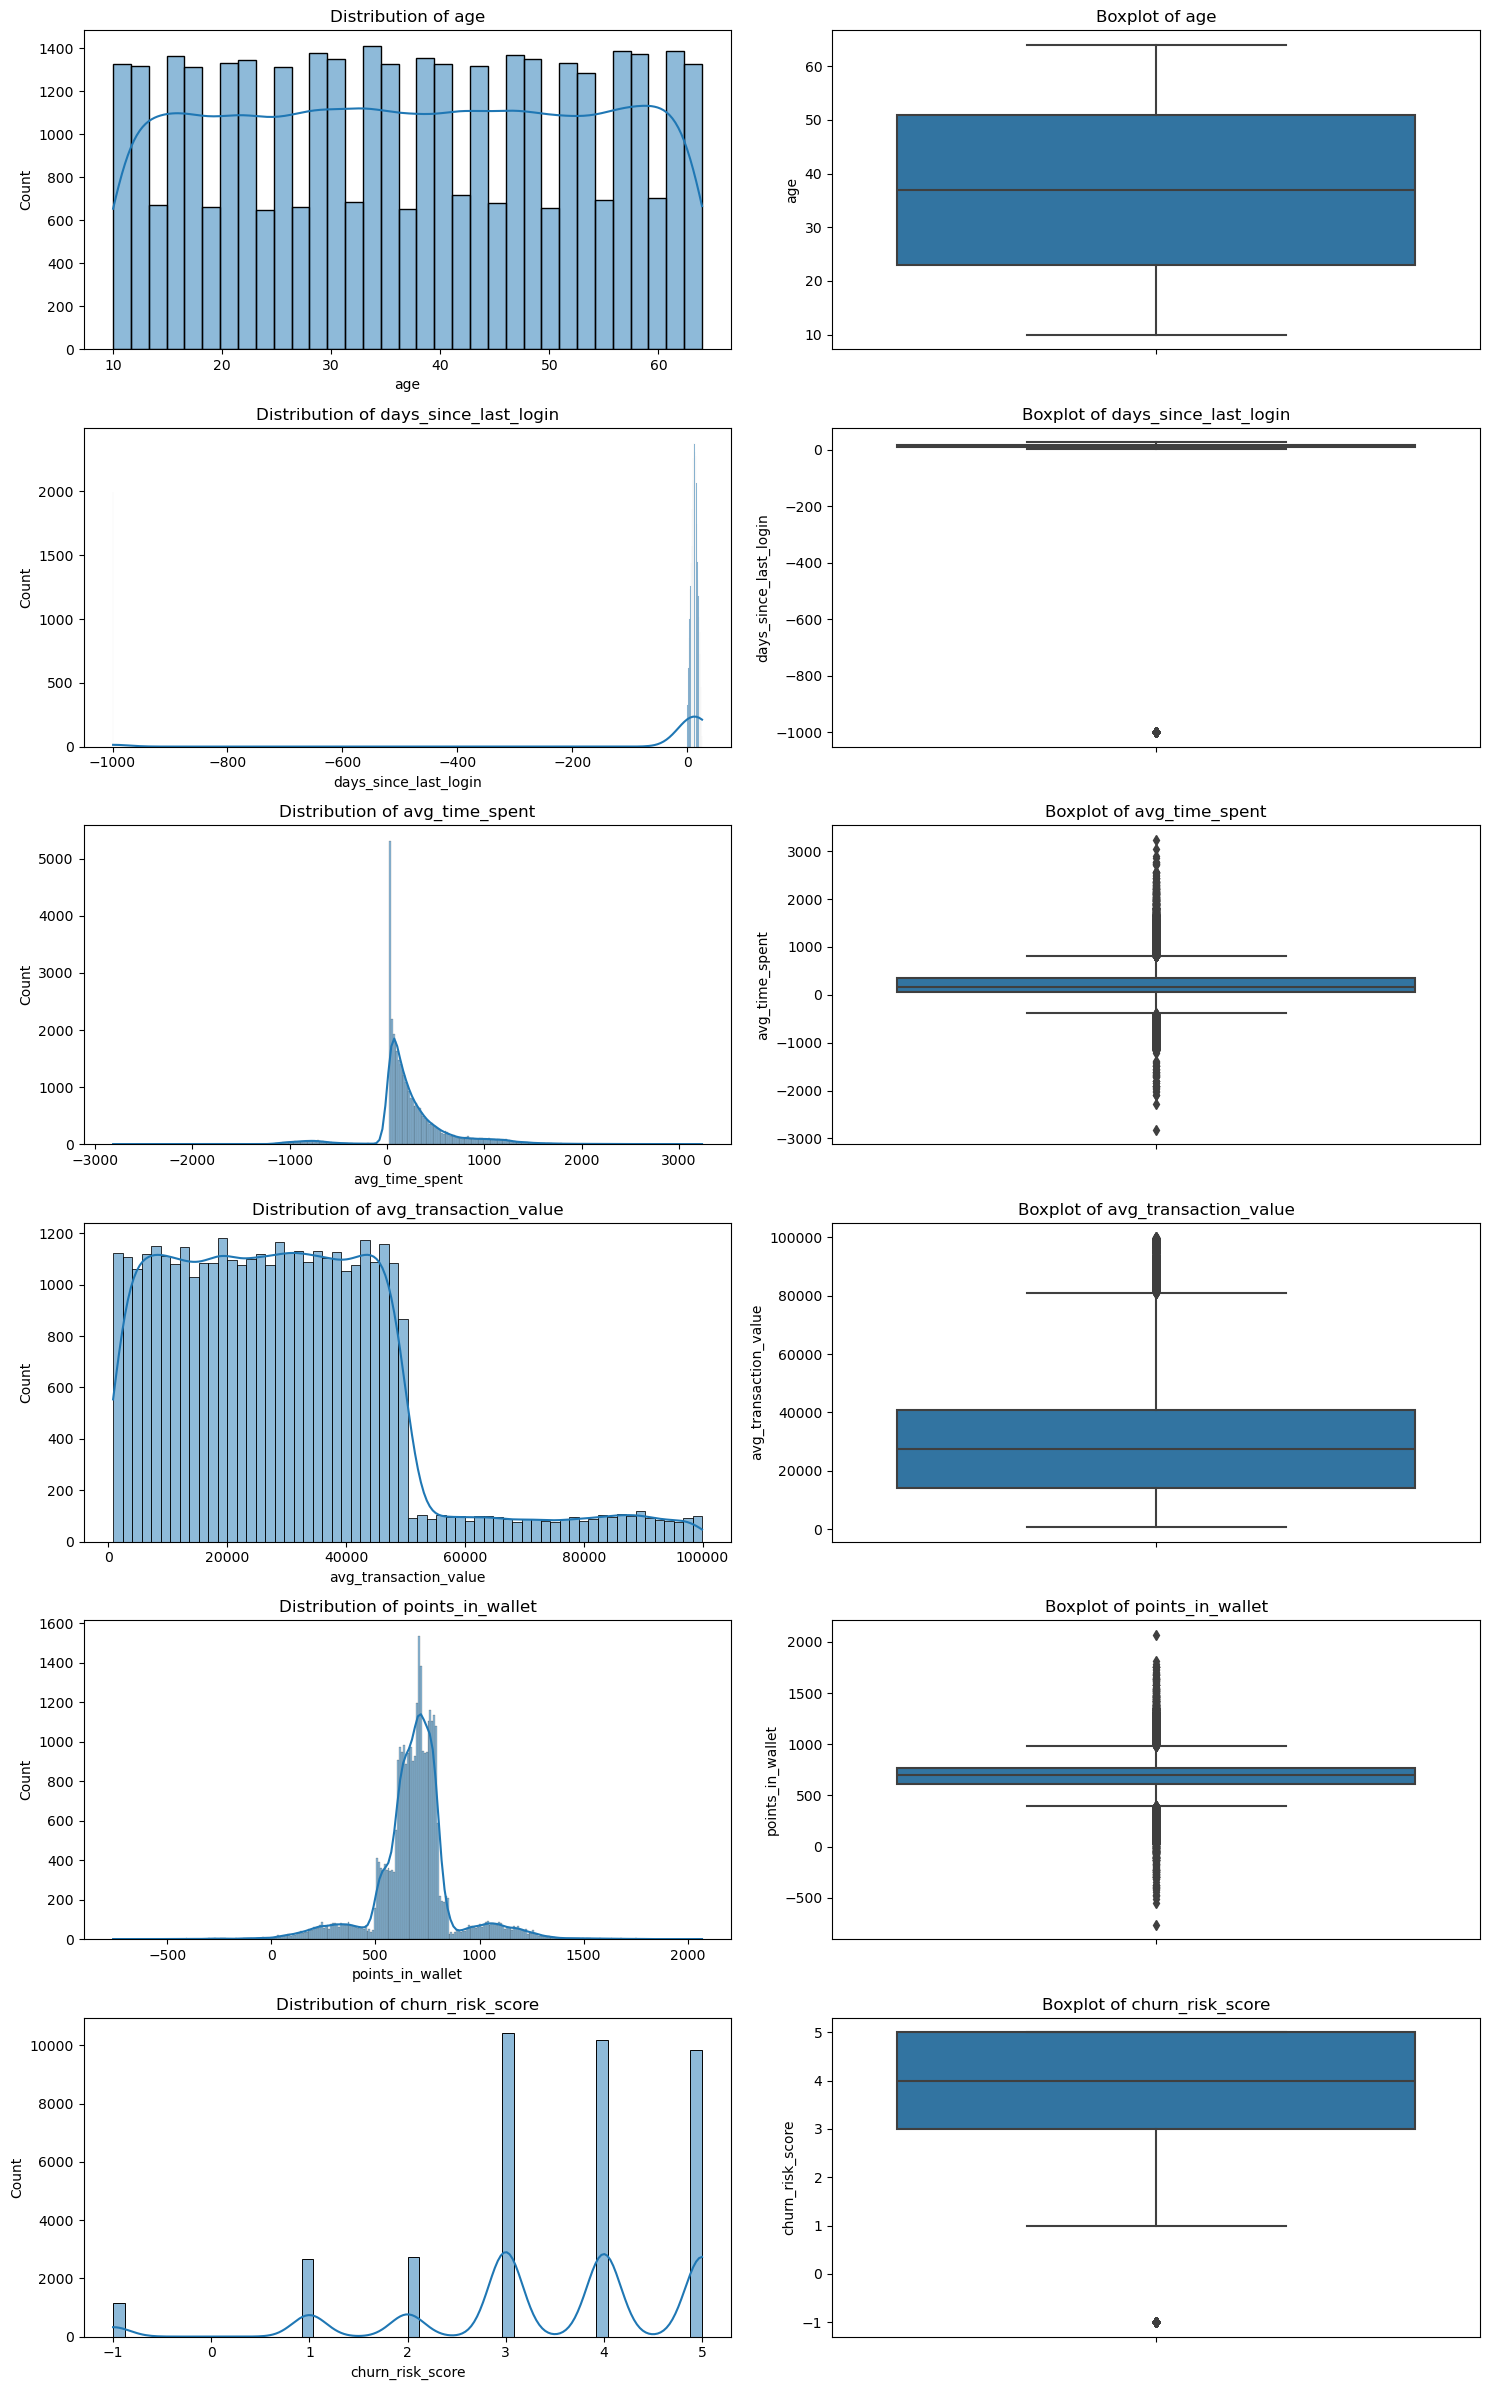

In [6]:

# Plot distributions
analyze_distributions(train_data)

analysis started


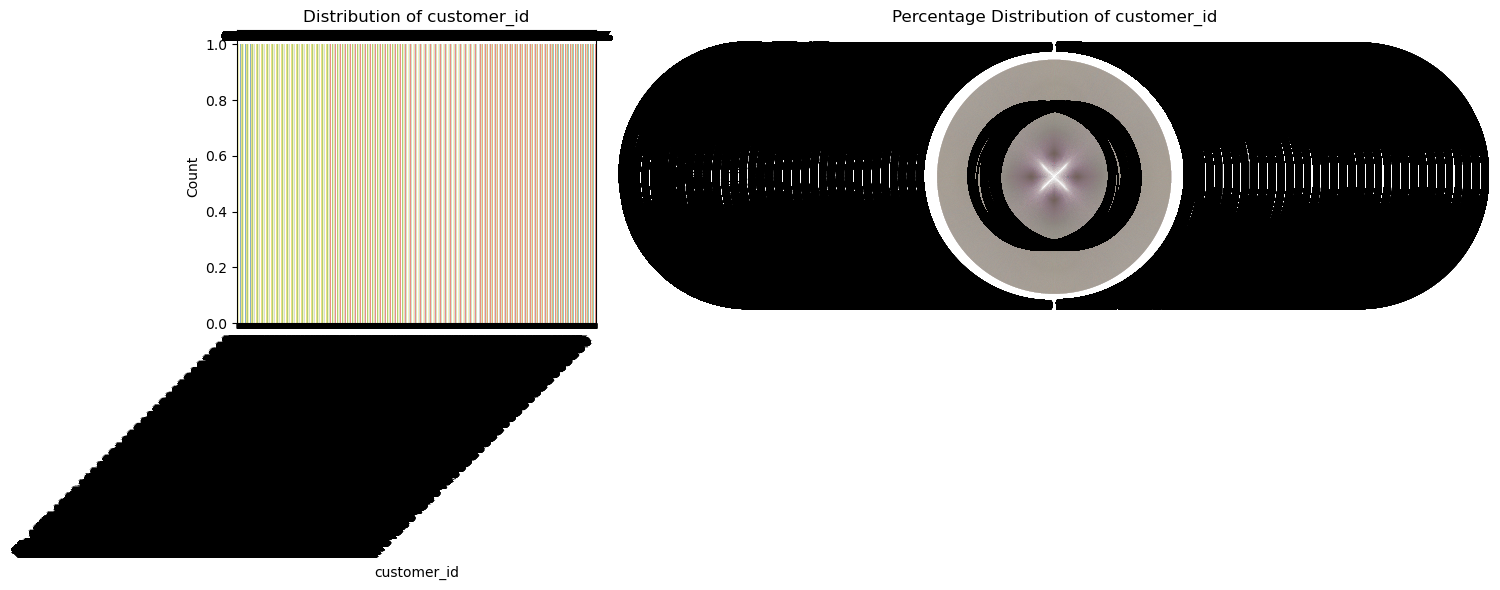


Summary for customer_id:
--------------------------------------------------
Number of unique values: 36992
Most common value: fffe4300490044003100 (0.0%)
Missing values: 0 (0.0%)

Value Counts:
                                      Count  Percentage
customer_id                                            
fffe4300490044003600300030003800          1    0.002703
fffe43004900440033003400330032003000      1    0.002703
fffe43004900440032003300340031003500      1    0.002703
fffe43004900440035003300380031003700      1    0.002703
fffe43004900440031003800300034003500      1    0.002703
...                                     ...         ...
fffe43004900440034003900380033003700      1    0.002703
fffe43004900440031003400330031003900      1    0.002703
fffe43004900440032003900340031003700      1    0.002703
fffe43004900440033003100350038003400      1    0.002703
fffe43004900440033003600340034003200      1    0.002703

[36992 rows x 2 columns]


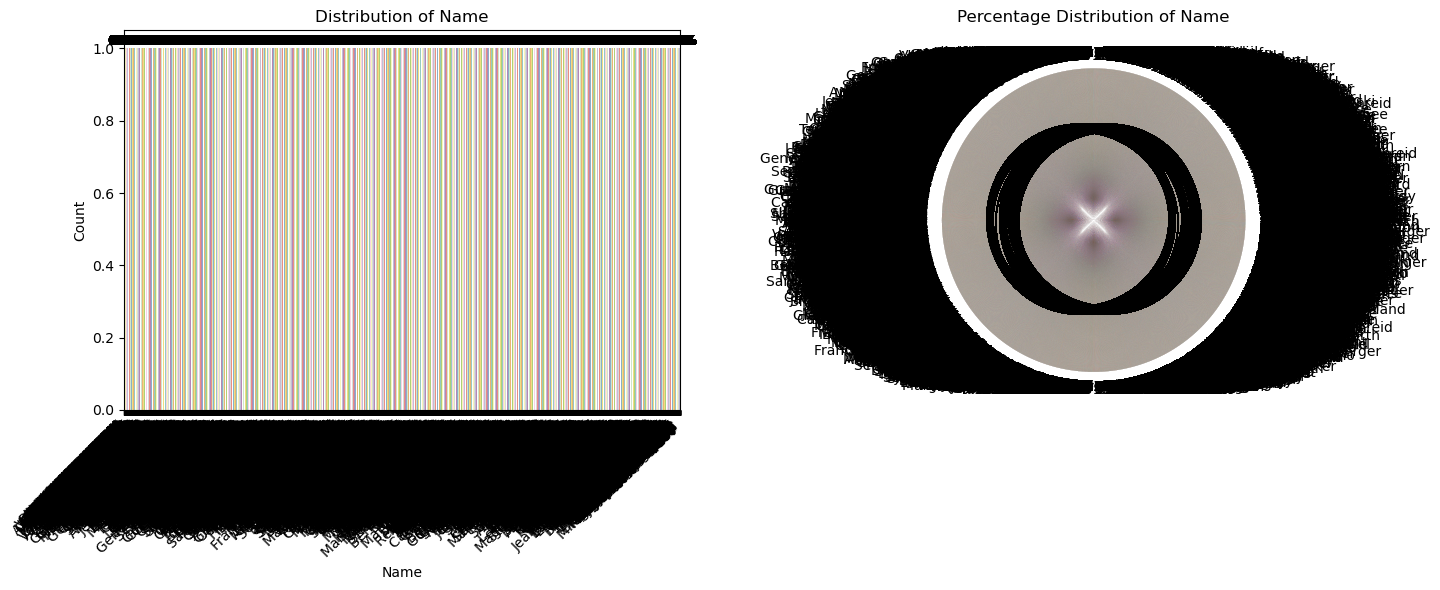


Summary for Name:
--------------------------------------------------
Number of unique values: 36992
Most common value: Aaron Achenbach (0.0%)
Missing values: 0 (0.0%)

Value Counts:
                  Count  Percentage
Name                               
Pattie Morrisey       1    0.002703
Brandon Casiano       1    0.002703
Merideth Gebo         1    0.002703
Neville Goodwill      1    0.002703
Sol Siemers           1    0.002703
...                 ...         ...
Gina Hintzen          1    0.002703
Kizzy Ramos           1    0.002703
Earlie Spalla         1    0.002703
Vinnie Talley         1    0.002703
Verlene Beaulieu      1    0.002703

[36992 rows x 2 columns]


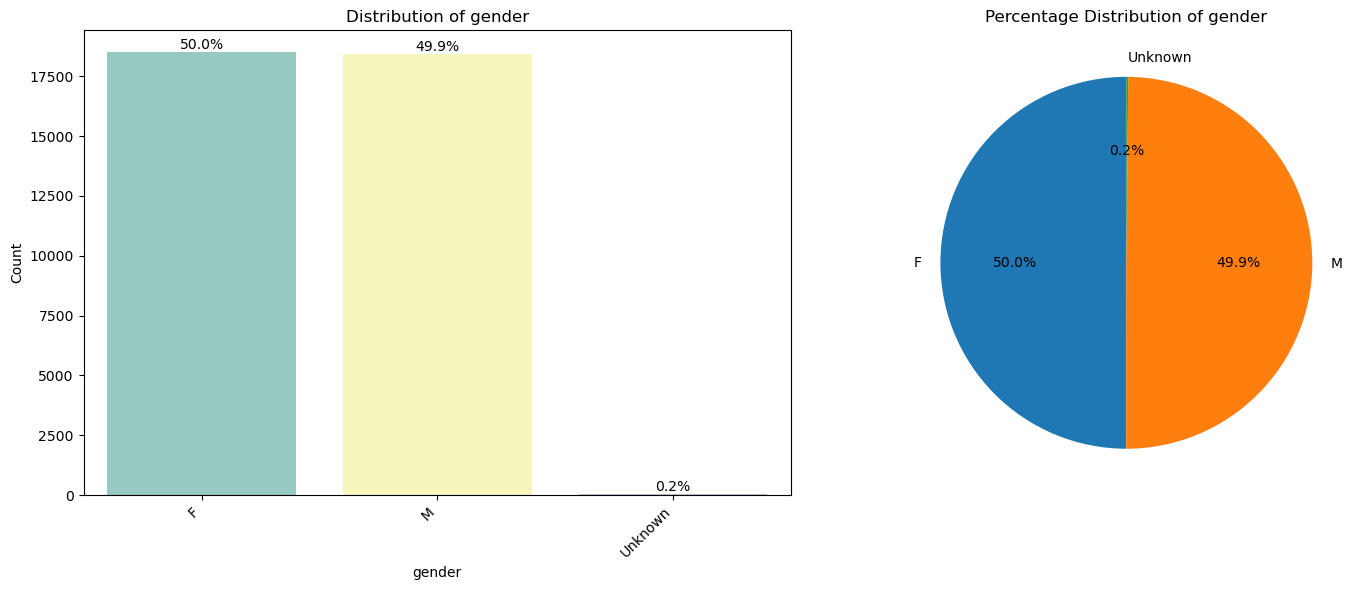


Summary for gender:
--------------------------------------------------
Number of unique values: 3
Most common value: F (50.0%)
Missing values: 0 (0.0%)

Value Counts:
         Count  Percentage
gender                    
F        18490   49.983780
M        18443   49.856726
Unknown     59    0.159494


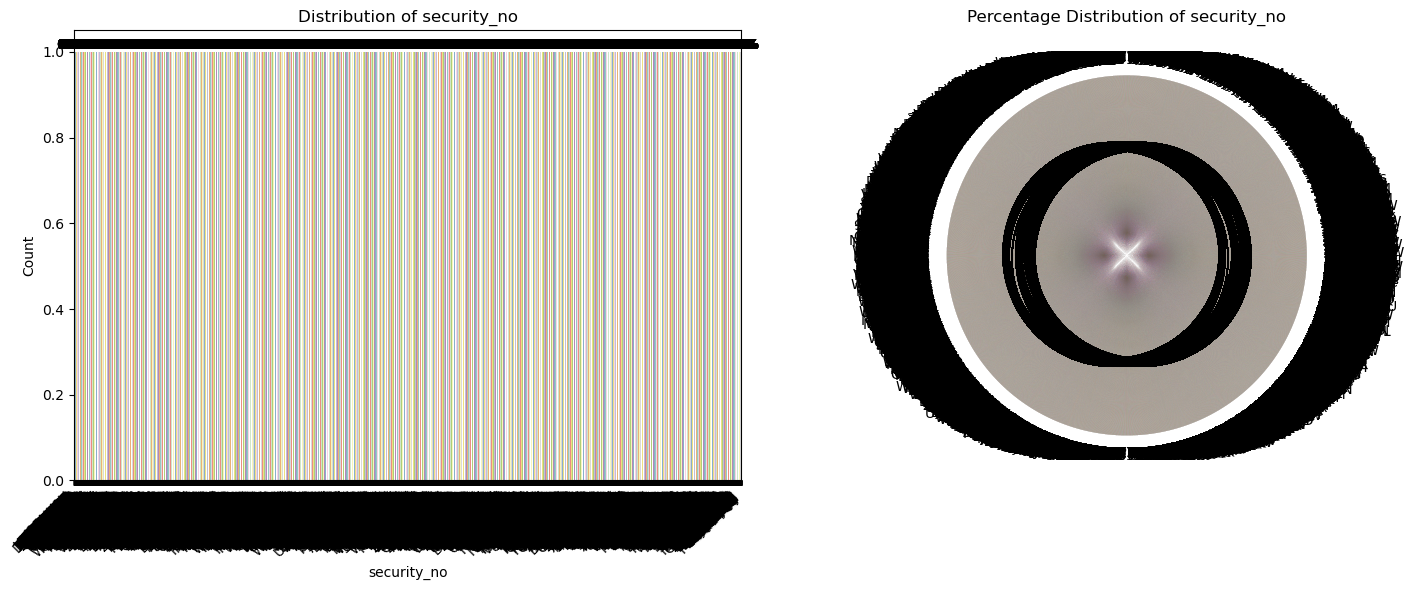


Summary for security_no:
--------------------------------------------------
Number of unique values: 36992
Most common value: 000NYHU (0.0%)
Missing values: 0 (0.0%)

Value Counts:
             Count  Percentage
security_no                   
XW0DQ7H          1    0.002703
4KYNLO2          1    0.002703
0TNAZKG          1    0.002703
O8IMCTW          1    0.002703
UN03OJW          1    0.002703
...            ...         ...
L9BXACS          1    0.002703
ESEDJQ2          1    0.002703
X92X4AF          1    0.002703
V526FJ1          1    0.002703
LBX0GLR          1    0.002703

[36992 rows x 2 columns]


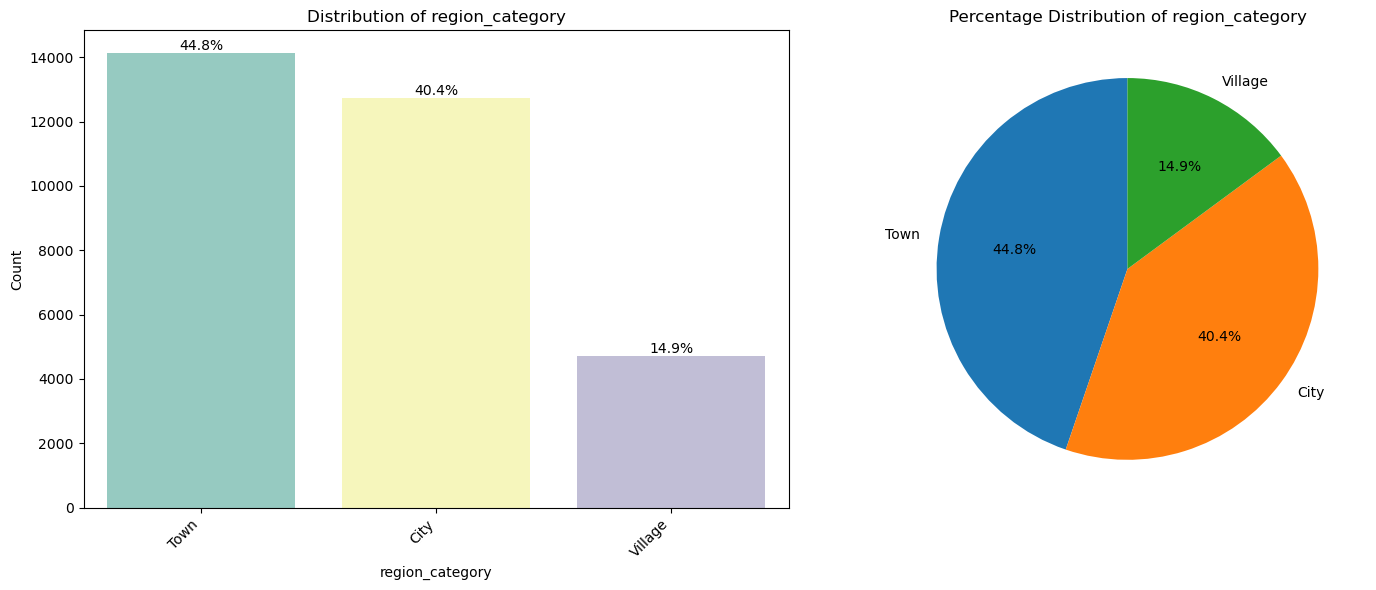


Summary for region_category:
--------------------------------------------------
Number of unique values: 3
Most common value: Town (44.8%)
Missing values: 5428 (14.7%)

Value Counts:
                 Count  Percentage
region_category                   
Town             14128   44.759853
City             12737   40.352934
Village           4699   14.887213


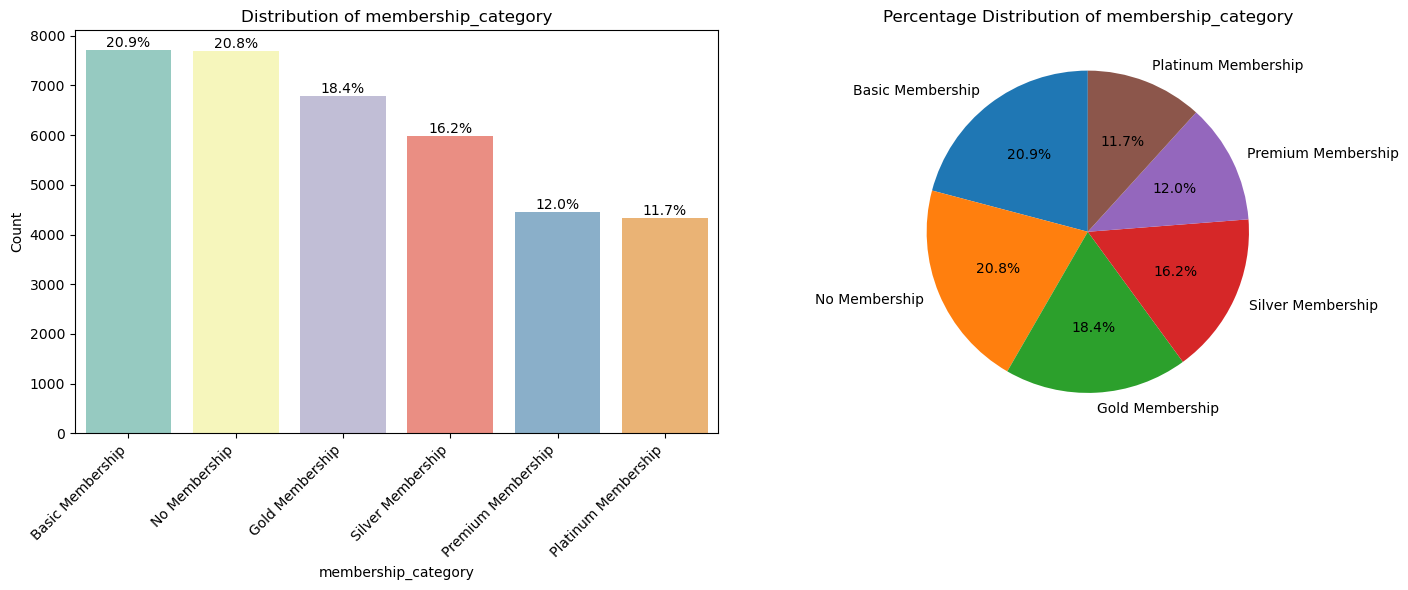


Summary for membership_category:
--------------------------------------------------
Number of unique values: 6
Most common value: Basic Membership (20.9%)
Missing values: 0 (0.0%)

Value Counts:
                     Count  Percentage
membership_category                   
Basic Membership      7724   20.880190
No Membership         7692   20.793685
Gold Membership       6795   18.368837
Silver Membership     5988   16.187284
Premium Membership    4455   12.043144
Platinum Membership   4338   11.726860


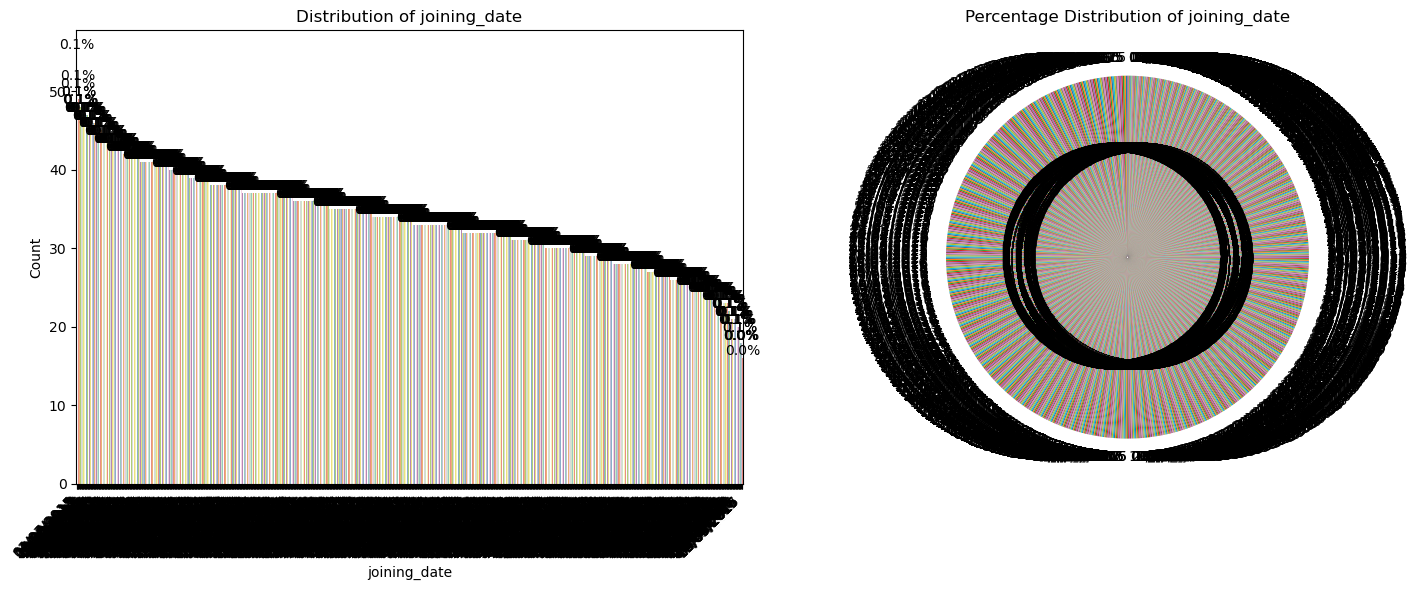


Summary for joining_date:
--------------------------------------------------
Number of unique values: 1096
Most common value: 02/06/2015 (0.1%)
Missing values: 0 (0.0%)

Value Counts:
              Count  Percentage
joining_date                   
02/06/2015       55    0.148681
04/07/2015       51    0.137868
21/06/2015       50    0.135164
26/06/2015       49    0.132461
03/08/2016       49    0.132461
...             ...         ...
16/03/2016       19    0.051362
03/06/2016       18    0.048659
12/09/2015       18    0.048659
03/07/2017       18    0.048659
04/03/2015       16    0.043253

[1096 rows x 2 columns]


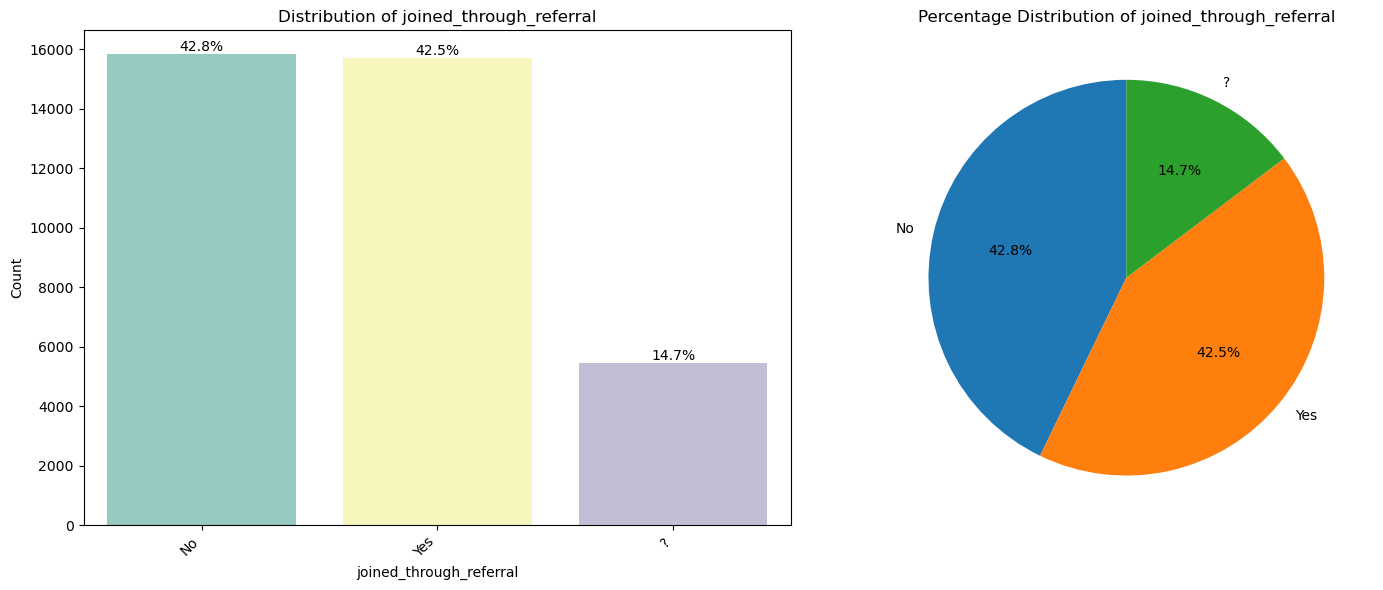


Summary for joined_through_referral:
--------------------------------------------------
Number of unique values: 3
Most common value: No (42.8%)
Missing values: 0 (0.0%)

Value Counts:
                         Count  Percentage
joined_through_referral                   
No                       15839   42.817366
Yes                      15715   42.482158
?                         5438   14.700476


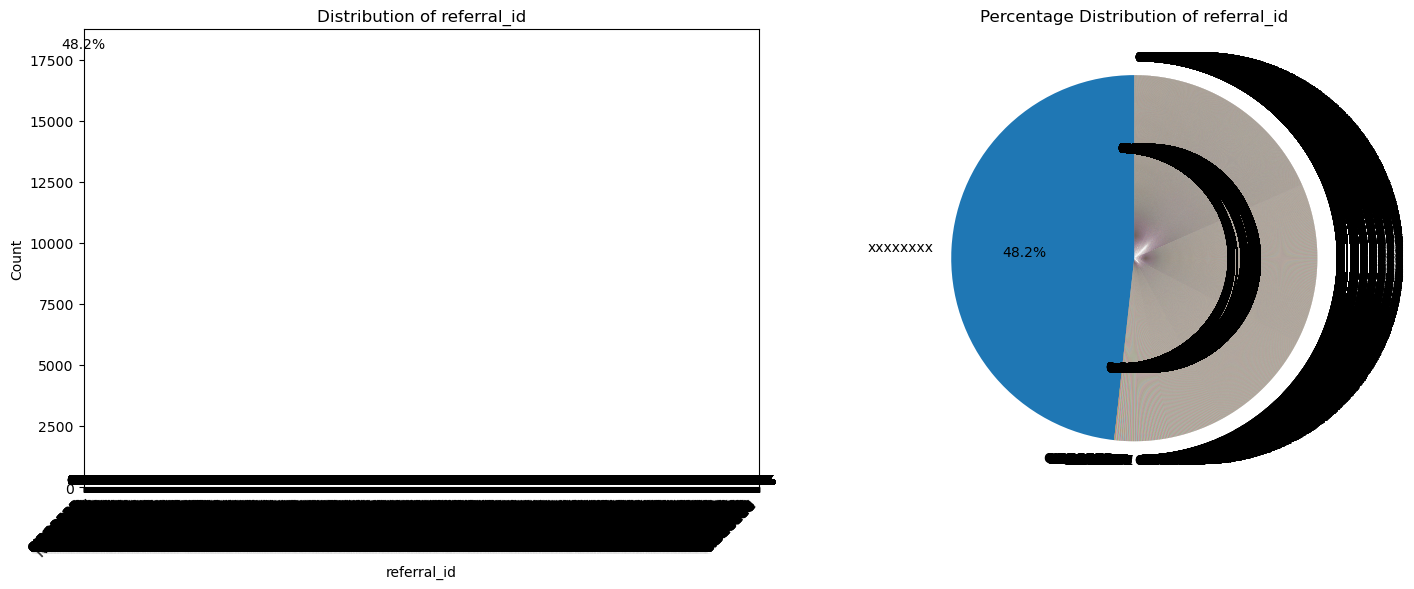


Summary for referral_id:
--------------------------------------------------
Number of unique values: 11359
Most common value: xxxxxxxx (48.2%)
Missing values: 0 (0.0%)

Value Counts:
             Count  Percentage
referral_id                   
xxxxxxxx     17846   48.242863
CID43705        12    0.032439
CID3979         11    0.029736
CID49601        10    0.027033
CID15792         9    0.024330
...            ...         ...
CID28755         1    0.002703
CID62237         1    0.002703
CID23663         1    0.002703
CID23071         1    0.002703
CID45477         1    0.002703

[11359 rows x 2 columns]


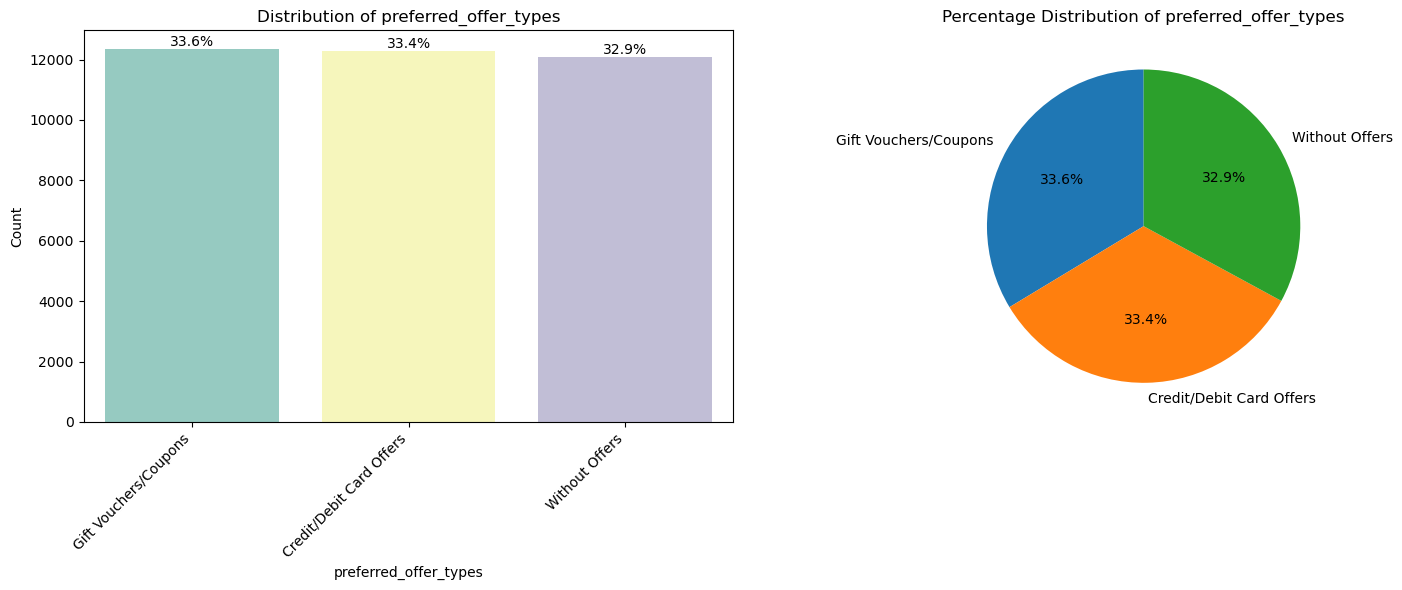


Summary for preferred_offer_types:
--------------------------------------------------
Number of unique values: 3
Most common value: Gift Vouchers/Coupons (33.6%)
Missing values: 288 (0.8%)

Value Counts:
                          Count  Percentage
preferred_offer_types                      
Gift Vouchers/Coupons     12349   33.644834
Credit/Debit Card Offers  12274   33.440497
Without Offers            12081   32.914669


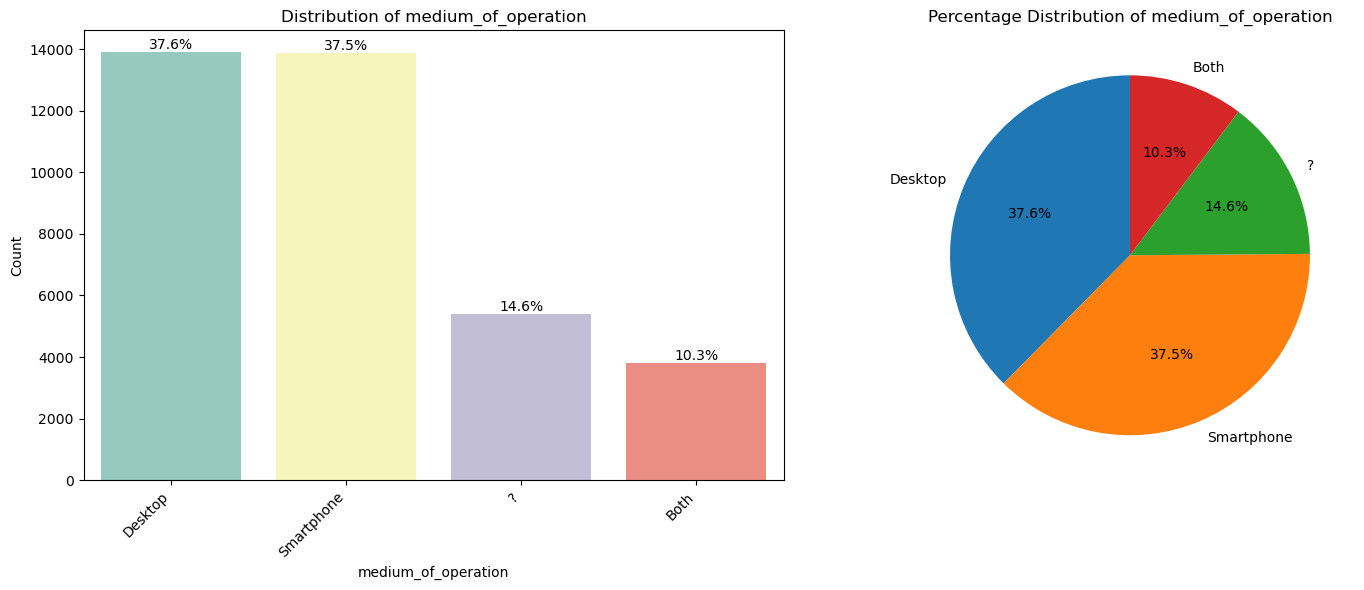


Summary for medium_of_operation:
--------------------------------------------------
Number of unique values: 4
Most common value: Desktop (37.6%)
Missing values: 0 (0.0%)

Value Counts:
                     Count  Percentage
medium_of_operation                   
Desktop              13913   37.610835
Smartphone           13876   37.510813
?                     5393   14.578828
Both                  3810   10.299524


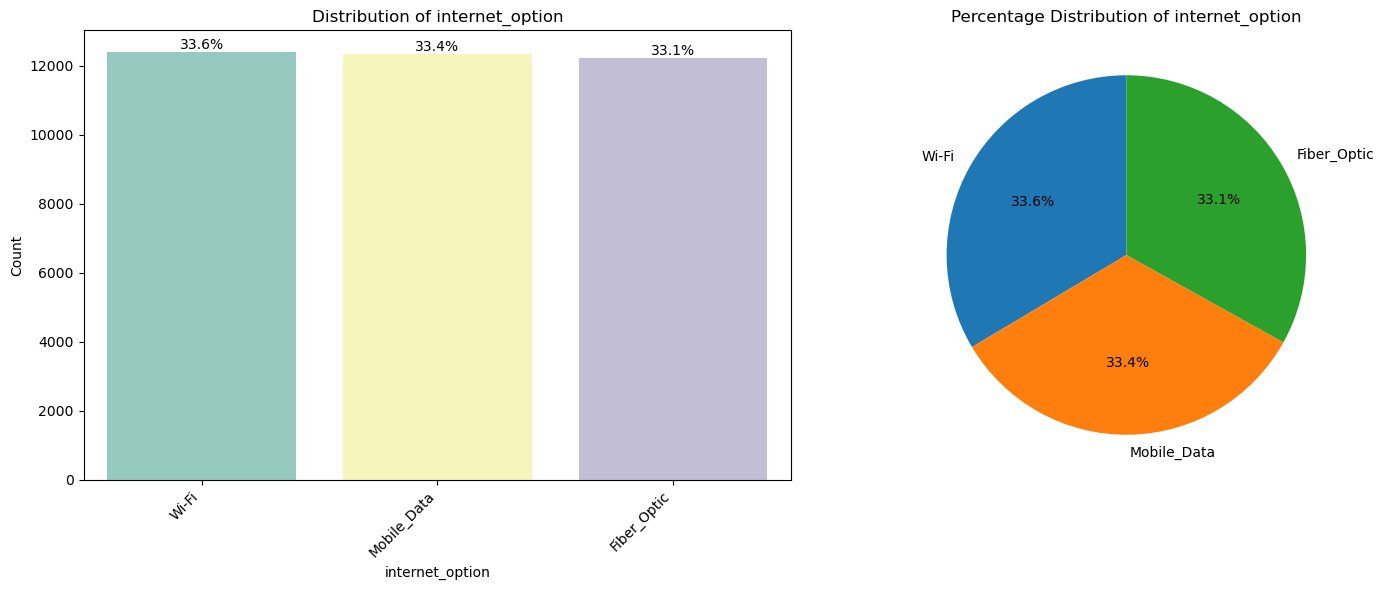


Summary for internet_option:
--------------------------------------------------
Number of unique values: 3
Most common value: Wi-Fi (33.6%)
Missing values: 0 (0.0%)

Value Counts:
                 Count  Percentage
internet_option                   
Wi-Fi            12413   33.555904
Mobile_Data      12343   33.366674
Fiber_Optic      12236   33.077422


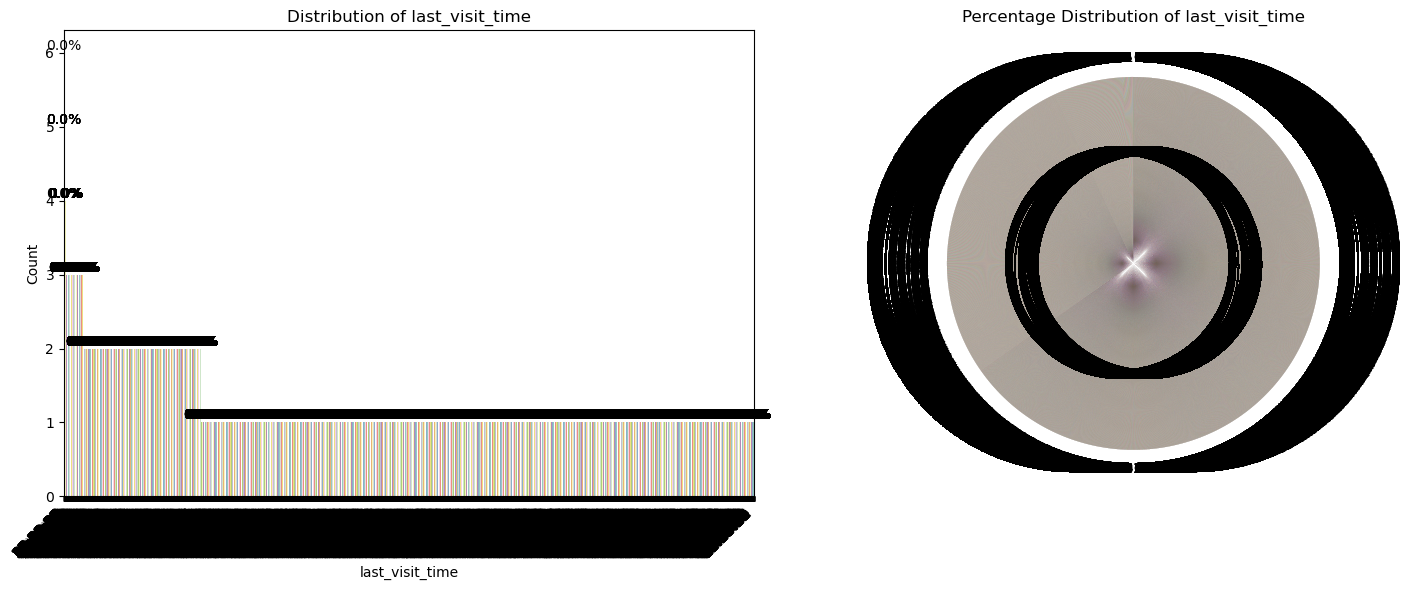


Summary for last_visit_time:
--------------------------------------------------
Number of unique values: 30101
Most common value: 07:56:41 (0.0%)
Missing values: 0 (0.0%)

Value Counts:
                 Count  Percentage
last_visit_time                   
07:56:41             6    0.016220
17:11:53             5    0.013516
22:31:06             5    0.013516
02:50:54             5    0.013516
12:30:02             5    0.013516
...                ...         ...
21:48:50             1    0.002703
07:53:40             1    0.002703
00:05:51             1    0.002703
10:48:11             1    0.002703
01:39:52             1    0.002703

[30101 rows x 2 columns]


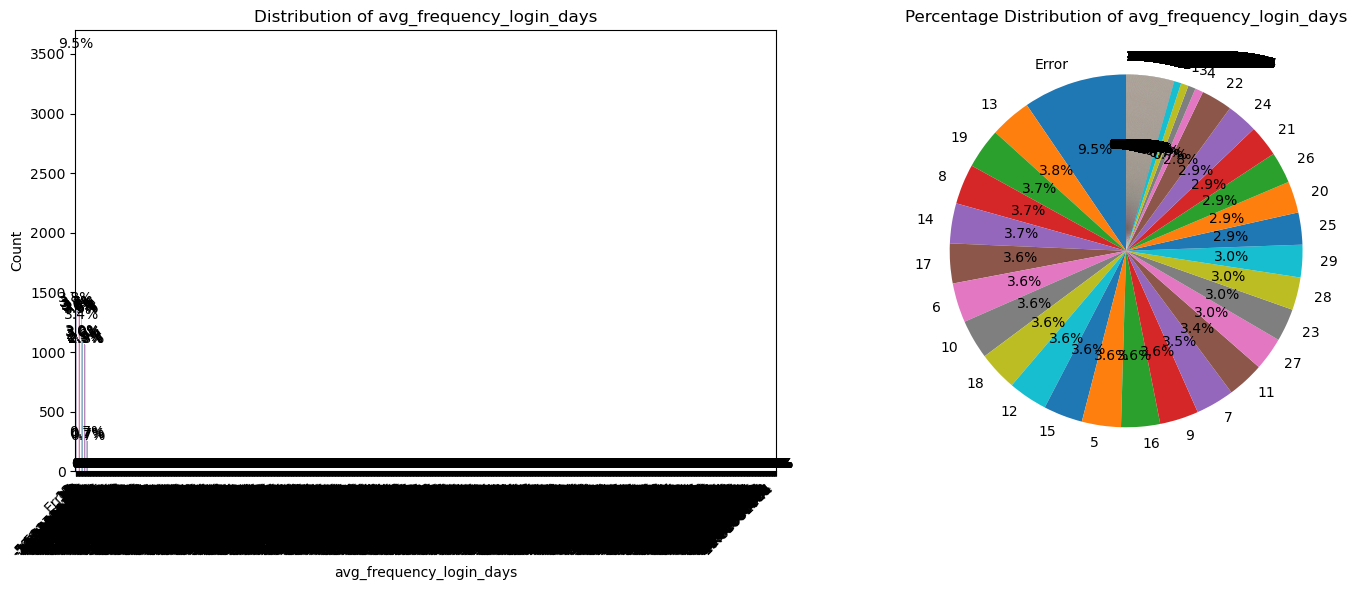


Summary for avg_frequency_login_days:
--------------------------------------------------
Number of unique values: 1654
Most common value: Error (9.5%)
Missing values: 0 (0.0%)

Value Counts:
                          Count  Percentage
avg_frequency_login_days                   
Error                      3522    9.520978
13                         1394    3.768382
19                         1365    3.689987
8                          1361    3.679174
14                         1355    3.662954
...                         ...         ...
28.1915704                    1    0.002703
41.73357295                   1    0.002703
-11.51593981                  1    0.002703
45.71683637                   1    0.002703
27.83992744                   1    0.002703

[1654 rows x 2 columns]


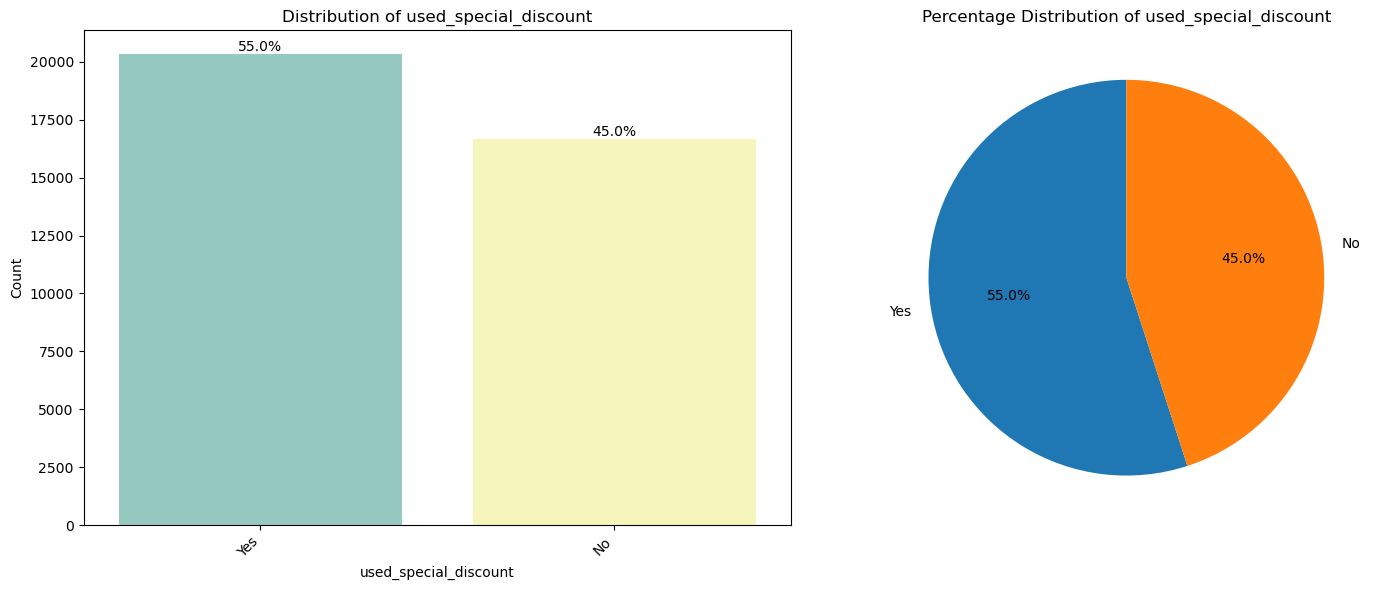


Summary for used_special_discount:
--------------------------------------------------
Number of unique values: 2
Most common value: Yes (55.0%)
Missing values: 0 (0.0%)

Value Counts:
                       Count  Percentage
used_special_discount                   
Yes                    20342   54.990268
No                     16650   45.009732


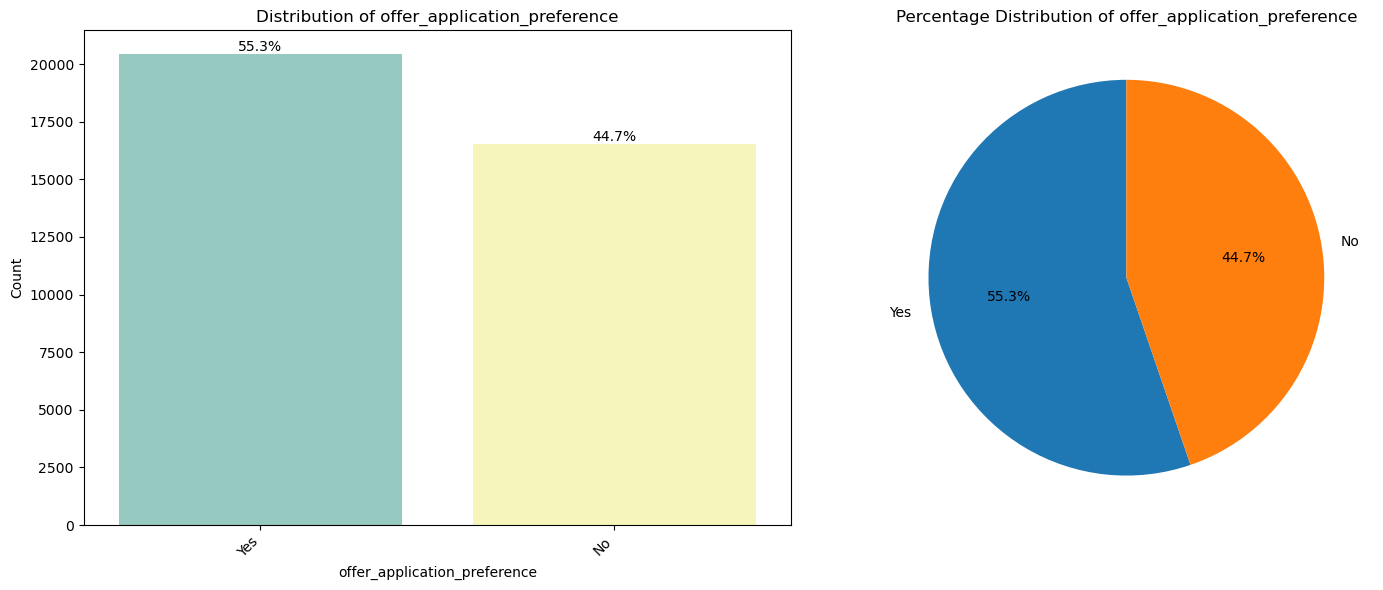


Summary for offer_application_preference:
--------------------------------------------------
Number of unique values: 2
Most common value: Yes (55.3%)
Missing values: 0 (0.0%)

Value Counts:
                              Count  Percentage
offer_application_preference                   
Yes                           20440    55.25519
No                            16552    44.74481


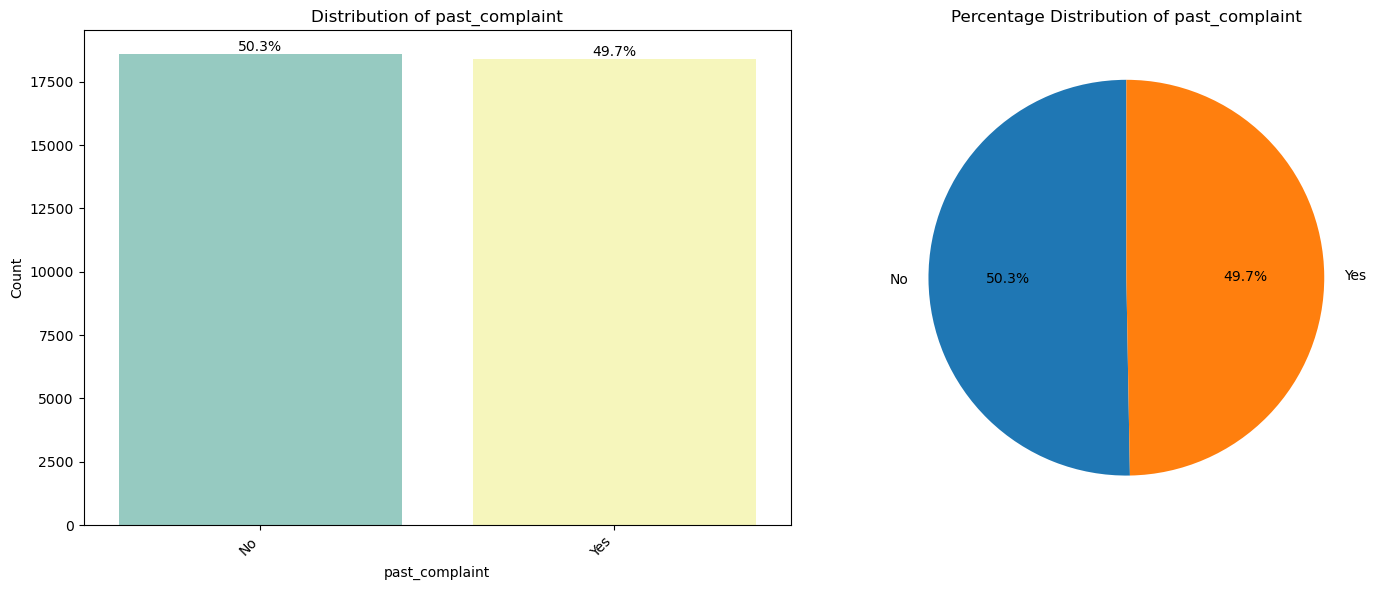


Summary for past_complaint:
--------------------------------------------------
Number of unique values: 2
Most common value: No (50.3%)
Missing values: 0 (0.0%)

Value Counts:
                Count  Percentage
past_complaint                   
No              18602   50.286548
Yes             18390   49.713452


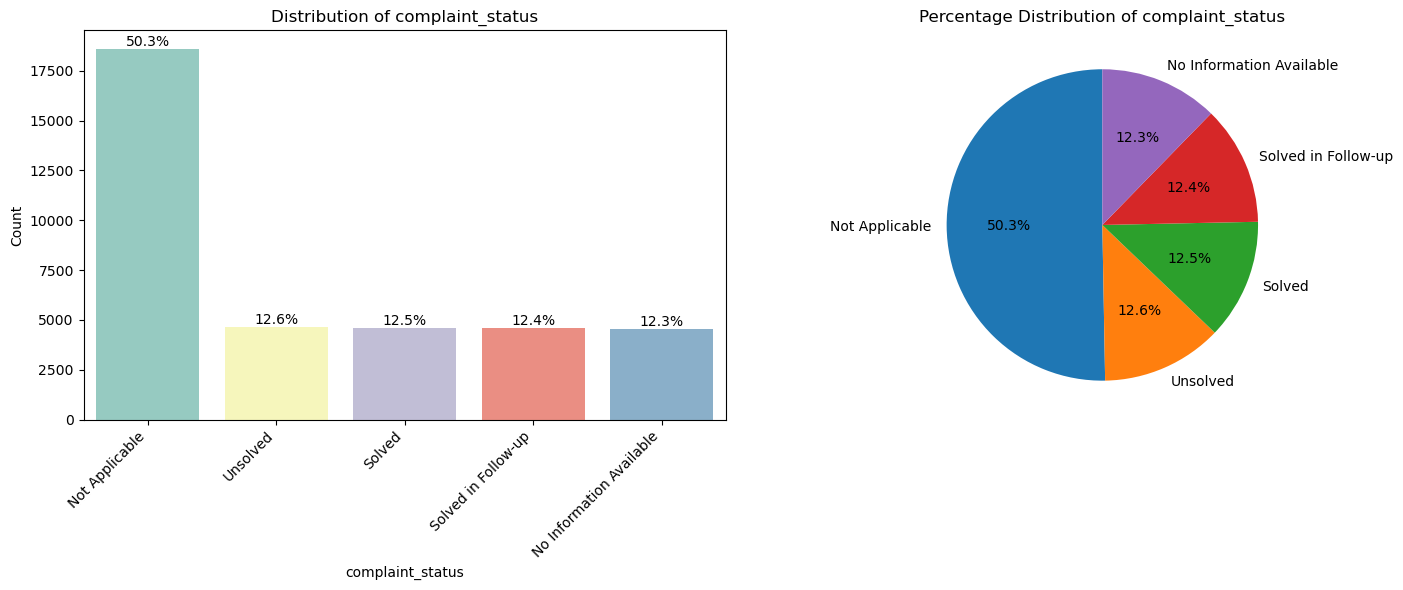


Summary for complaint_status:
--------------------------------------------------
Number of unique values: 5
Most common value: Not Applicable (50.3%)
Missing values: 0 (0.0%)

Value Counts:
                          Count  Percentage
complaint_status                           
Not Applicable            18602   50.286548
Unsolved                   4644   12.554066
Solved                     4619   12.486484
Solved in Follow-up        4577   12.372946
No Information Available   4550   12.299957


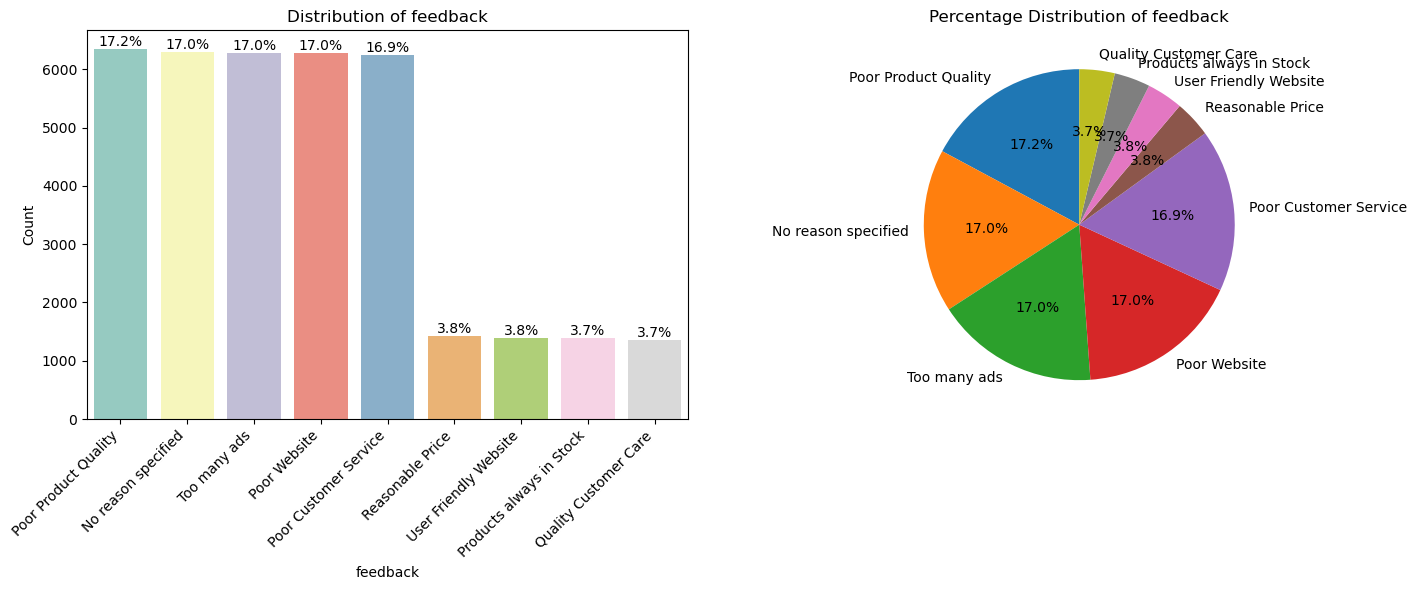


Summary for feedback:
--------------------------------------------------
Number of unique values: 9
Most common value: Poor Product Quality (17.2%)
Missing values: 0 (0.0%)

Value Counts:
                          Count  Percentage
feedback                                   
Poor Product Quality       6350   17.165874
No reason specified        6290   17.003676
Too many ads               6279   16.973940
Poor Website               6271   16.952314
Poor Customer Service      6252   16.900952
Reasonable Price           1417    3.830558
User Friendly Website      1391    3.760272
Products always in Stock   1382    3.735943
Quality Customer Care      1360    3.676471

High Cardinality Columns Analysis:
--------------------------------------------------

customer_id:
Number of unique values: 36992
Top 10 most frequent values:
customer_id
fffe4300490044003600300030003800        1
fffe43004900440033003400330032003000    1
fffe43004900440032003300340031003500    1
fffe430049004400350033003800

In [7]:
print('analysis started')
analyze_non_numeric_distributions(train_data)
print('analysis finished')

# 3. Bias Analysis


### Initial Assessment of the Dataset

Here are some key observations and potential biases:
- Selection bias
- Measurement bias
- Demographic representation
- Time-related biases: 


### **3.1. Selection Bias**
- **Possible Issues**:
  - The column `region_category` indicates whether customers are from "Village," "City," or "Town." Missing values (`5428` out of `36992`) could mean certain regions are underrepresented, potentially skewing analysis.
  - If the dataset only includes customers with memberships (`membership_category`), non-members may be excluded, biasing insights.


- **My Potential Solution**:
  - Assess the proportion of missing `region_category` values.
  - Check if the dataset represents all desired regions evenly.



### **3.2. Measurement Bias**
- **Possible Issues**:
  - Columns like `days_since_last_login`, `avg_time_spent`, and `points_in_wallet` might have inaccuracies. Missing or incorrect entries (`points_in_wallet` has 3443 missing values) can distort results.
  - Self-reported columns, like `feedback`, may have subjective or inconsistent inputs.

- **My Potential Solution**:
  - Impute or drop missing values thoughtfully.
  



### **3.3. Demographic Representation Bias**
- **Possible Issues**:
  - `age` and `gender` could indicate skewed representation across age groups or genders. If one demographic dominates, the model may not generalize well to others. However, looking at the gender distribution, this seems balanced.
  - Check if `region_category` and `membership_category` align with demographic diversity.

- **Solution**:
  - Analyze the distribution of `age`, `gender`, and `region_category` to ensure fair representation.

---

### **3.4. Time-Related Bias**
- **Possible Issues**:
  - `joining_date` and `last_visit_time` suggest temporal aspects. If data collection spans only certain time periods, conclusions may not generalize to other periods.
  - Seasonal or temporal patterns could influence customer behavior, such as average transaction values or churn risk.

- **Solution**:
  - Verify if data spans multiple years, seasons, or significant events.
  - Segment analysis by time to capture temporal variations.

---

### Next Steps
1. Analyze the distribution of key columns (`age`, `gender`, `region_category`, etc.) to detect representation bias.
2. Address missing values in columns like `region_category` and `points_in_wallet`.
3. Examine temporal coverage of the data in `joining_date` and `last_visit_time`.
4. Assess if feedback categories or churn scores exhibit potential skew.
5. Exclude columns unnuseful columns like `customer_id`,`security_no`, `Name` and `referral_id` 

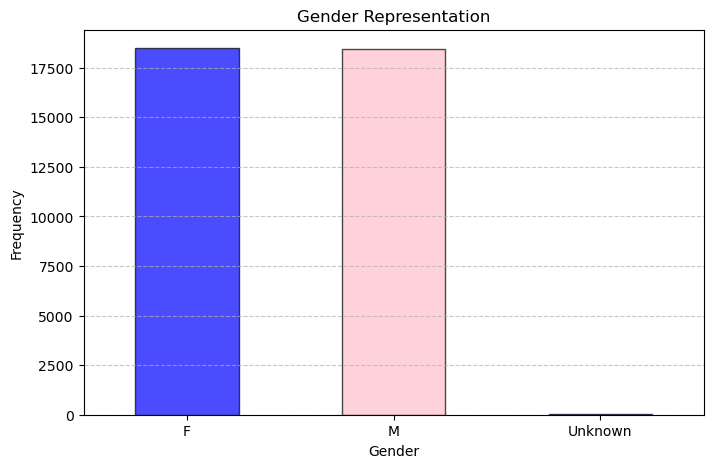

{'F': 18490, 'M': 18443, 'Unknown': 59}

In [8]:
# Check gender distribution
gender_counts = train_data['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Provide numerical breakdown
# age_summary = train_data['age'].describe()
gender_summary = gender_counts.to_dict()

# age_summary,
gender_summary

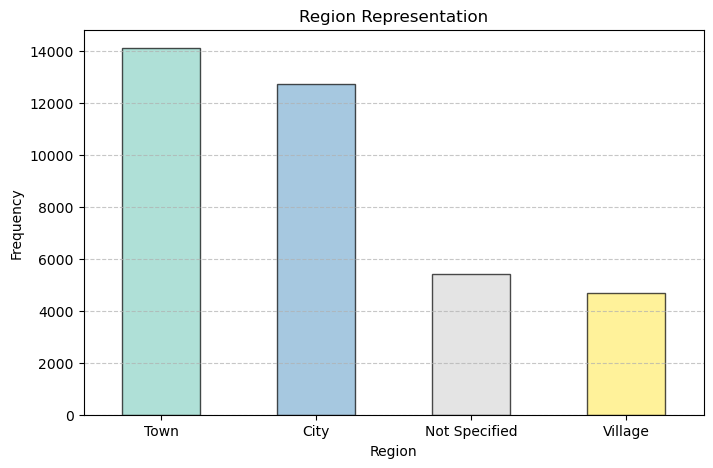

{'Town': 14128, 'City': 12737, 'Not Specified': 5428, 'Village': 4699}

In [9]:
# Check region distribution
region_counts = train_data['region_category'].fillna('Not Specified').value_counts()
plt.figure(figsize=(8, 5))
# Create a colormap with enough distinct colors
colors = plt.cm.Set3(np.linspace(0, 1, len(region_counts)))

region_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)
plt.title('Region Representation')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

region_summary = region_counts.to_dict()

region_summary

### Exclude columns unnuseful columns like `customer_id`,`security_no`, `Name` and `referral_id`

In [10]:
excluded_columns = ['customer_id','security_no', 'Name','referral_id']
filtered_columns_train = [col for col in train_data if col not in excluded_columns]
filtered_columns_test = [col for col in test_data if col not in excluded_columns]
filtered_data_train = train_data[filtered_columns_train]
filtered_data_test = test_data[filtered_columns_test]


### Analyze the rest of the non-numerical data

In [11]:
# analyze_non_numeric_distributions(filtered_data_train)
# print('analysis finished')

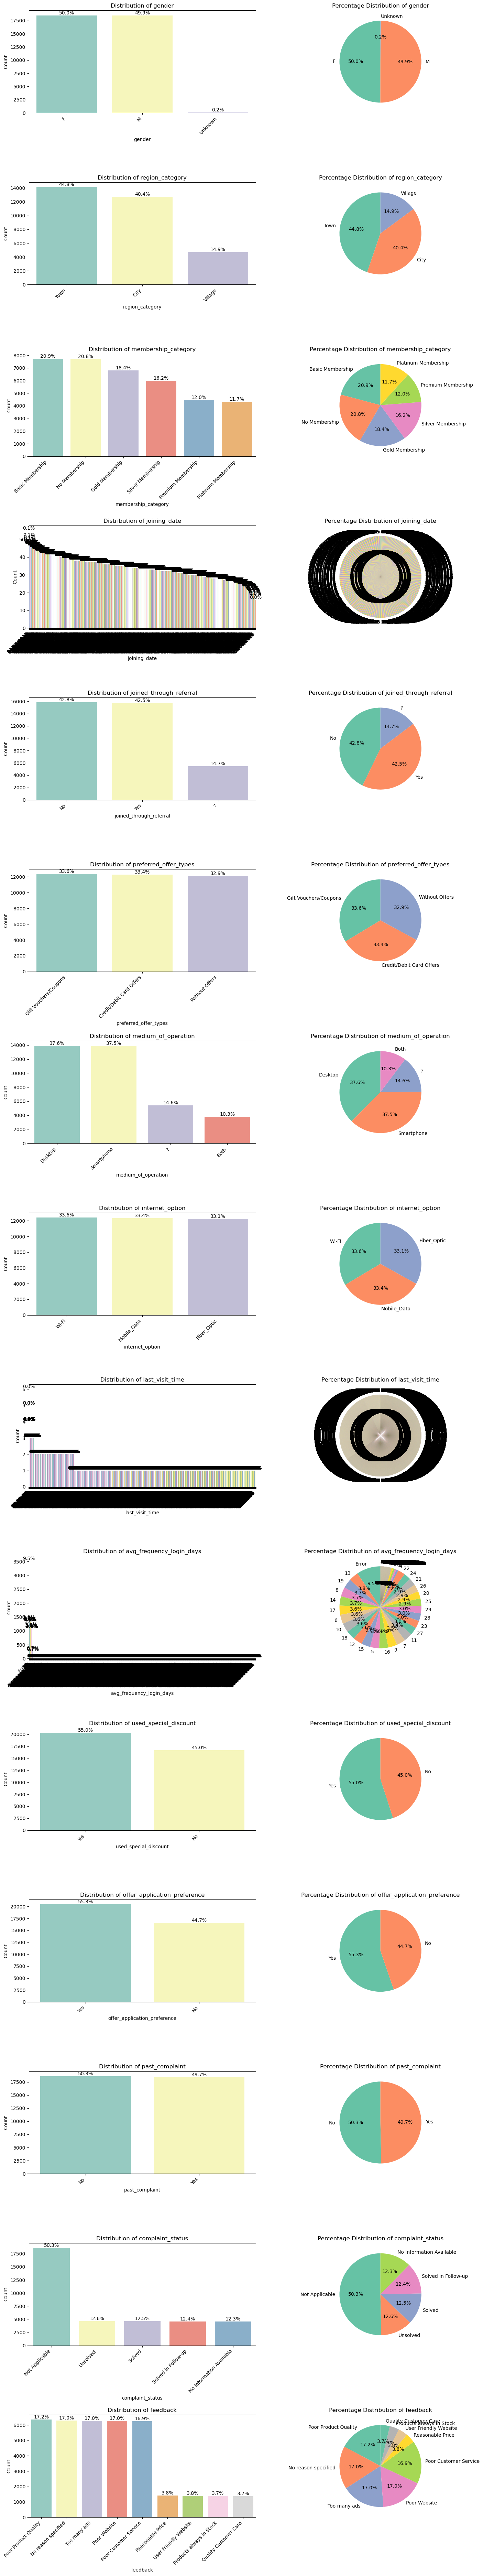


Summary for gender:
--------------------------------------------------
Number of unique values: 3
Most common value: F (17.2%)
Missing values: 0 (0.0%)

Value Counts:
                          Count  Percentage
feedback                                   
Poor Product Quality       6350   17.165874
No reason specified        6290   17.003676
Too many ads               6279   16.973940
Poor Website               6271   16.952314
Poor Customer Service      6252   16.900952
Reasonable Price           1417    3.830558
User Friendly Website      1391    3.760272
Products always in Stock   1382    3.735943
Quality Customer Care      1360    3.676471

Summary for region_category:
--------------------------------------------------
Number of unique values: 3
Most common value: Town (17.2%)
Missing values: 5428 (14.7%)

Value Counts:
                          Count  Percentage
feedback                                   
Poor Product Quality       6350   17.165874
No reason specified        6290 

In [12]:
analyze_non_numeric_distributions2(filtered_data_train)
print('analysis finished')

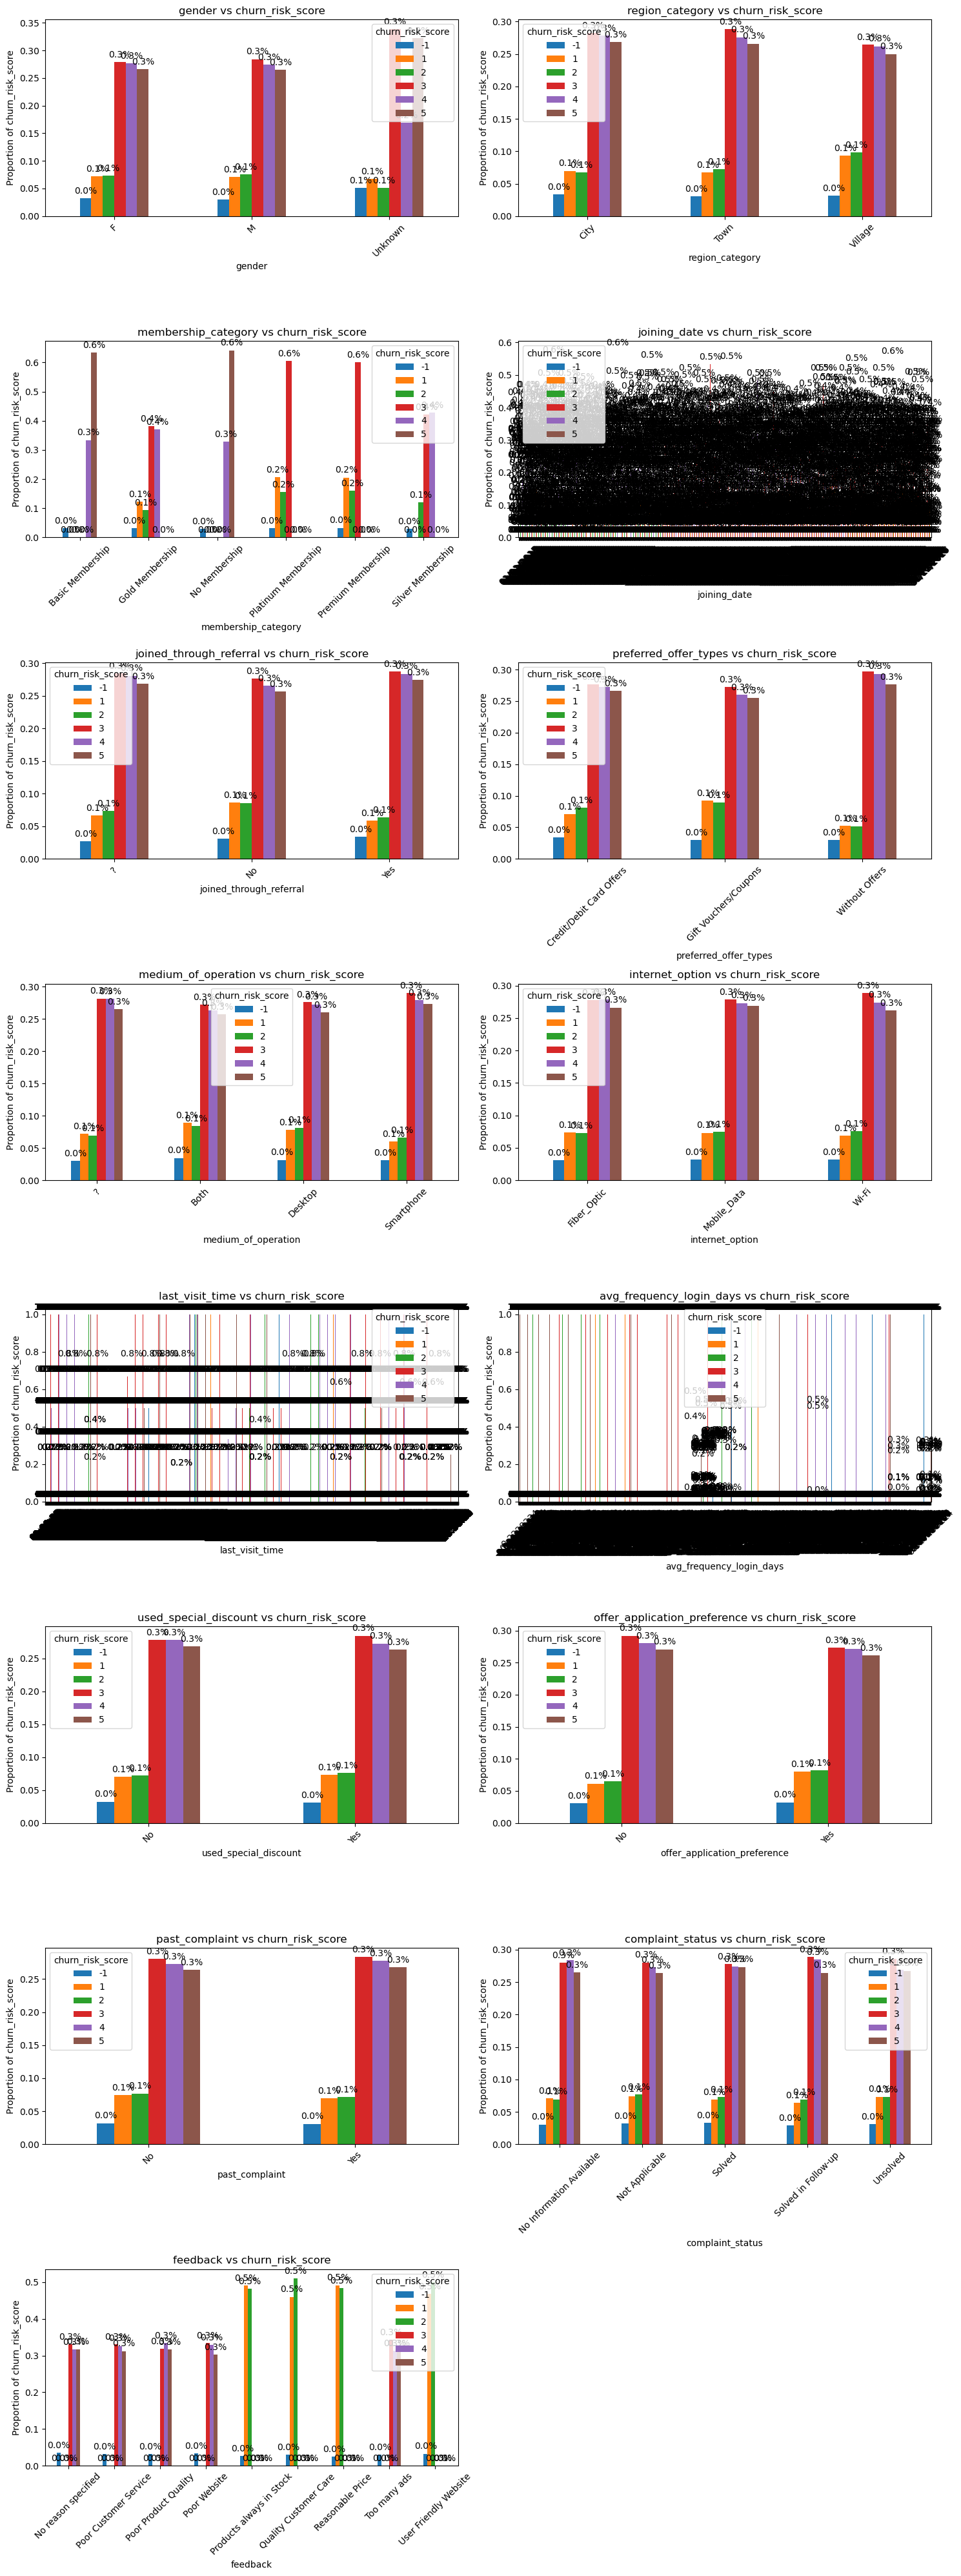


Detailed Statistics:
--------------------------------------------------

gender breakdown:
churn_risk_score   -1    1    2     3     4     5
gender                                           
F                 3.2  7.2  7.3  27.9  27.7  26.6
M                 3.0  7.1  7.5  28.4  27.4  26.5
Unknown           5.1  6.8  5.1  33.9  16.9  32.2

region_category breakdown:
churn_risk_score   -1    1    2     3     4     5
region_category                                  
City              3.3  7.0  6.8  28.2  27.8  26.9
Town              3.0  6.7  7.2  28.9  27.6  26.6
Village           3.2  9.3  9.8  26.5  26.2  25.0

membership_category breakdown:
churn_risk_score      -1     1     2     3     4     5
membership_category                                   
Basic Membership     3.2   0.0   0.0   0.0  33.4  63.3
Gold Membership      3.3  12.3   9.3  38.1  37.0   0.0
No Membership        2.9   0.0   0.0   0.0  32.9  64.1
Platinum Membership  3.1  20.7  15.6  60.6   0.0   0.0
Premium Membership

In [13]:
analyze_categorical_relationships(filtered_data_train, 'churn_risk_score')

In [14]:
check_cardinality(filtered_data_train)

nunique  percent_unique
last_visit_time                 30101       81.371648
avg_frequency_login_days         1654        4.471237
joining_date                     1096        2.962803
feedback                            9        0.024330
membership_category                 6        0.016220
complaint_status                    5        0.013516
medium_of_operation                 4        0.010813
gender                              3        0.008110
region_category                     3        0.008110
joined_through_referral             3        0.008110
preferred_offer_types               3        0.008110
internet_option                     3        0.008110
used_special_discount               2        0.005407
offer_application_preference        2        0.005407
past_complaint                      2        0.005407

# **Observations**

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions: `No membership` and `Basic membership` are most likely to have high churn risj score
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:

# 4. Feature Engineering

In [15]:

# Apply feature engineering
train_data_processed = engineer_features(filtered_data_train)
test_data_processed = engineer_features(filtered_data_test)


In [16]:
# Check the shapes of the old and new (engineered) processed train and test data sets
print(f"original train data shape: {train_data.shape}")
print(f"filtered_columns_train data shape: {filtered_data_train.shape}")
print(f"train_data_processed data train data shape: {train_data_processed.shape}")
print(train_data_processed.columns.tolist())

print(f"original test data shape: {test_data.shape}")
print(f"filtered_columns_test data shape: {filtered_data_test.shape}")
print(f"test_data_processed data train data shape: {test_data_processed.shape}")
print(test_data_processed.columns.tolist())


original train data shape: (36992, 25)
filtered_columns_train data shape: (36992, 21)
train_data_processed data train data shape: (36992, 25)
['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score', 'engagement_score', 'complaint_resolution_rate', 'membership_value', 'activity_level']
original test data shape: (19919, 24)
filtered_columns_test data shape: (19919, 20)
test_data_processed data train data shape: (19919, 24)
['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since

# 5. Data Preprocessing
* Handles missing values
* Scales numerical features
* Encodes categorical variables

In [24]:
# For training data:
train_processed, fitted_transformers = preprocess_data(train_data, is_training=True)
train_columns = train_processed.columns.tolist()

# Save columns for later use
np.save('train_columns.npy', train_columns)

# For test/validation data (using same transformations):
test_processed, _ = preprocess_data(test_data, is_training=False, fitted_transformers=fitted_transformers)
train_columns = np.load('train_columns.npy')

# Align test columns with train columns
for col in train_columns:
    if col not in test_processed.columns:
        test_processed[col] = 0
test_processed = test_processed[train_columns]

# Print summary of preprocessing
#  to see that they both engineered test and train have same columns 

print("\nPreprocessing Summary:")
print(f"Original train shape: {train_data.shape}")
print(f"Processed train shape: {train_processed.shape}")
print(f"Original test shape: {test_data.shape}")
print(f"Processed test shape: {test_processed.shape}")

# Print feature names to verify
print("\nFeatures after preprocessing:")
print(train_processed.columns.tolist())


Preprocessing Summary:
Original train shape: (36992, 25)
Processed train shape: (36992, 52)
Original test shape: (19919, 24)
Processed test shape: (19919, 52)

Features after preprocessing:
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'days_since_joining', 'days_since_last_visit', 'engagement_score', 'gender_F', 'gender_M', 'gender_Unknown', 'region_category_City', 'region_category_Town', 'region_category_Village', 'membership_category_Basic Membership', 'membership_category_Gold Membership', 'membership_category_No Membership', 'membership_category_Platinum Membership', 'membership_category_Premium Membership', 'membership_category_Silver Membership', 'joined_through_referral_?', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Credit/Debit Card Offers', 'preferred_offer_types_Gift Vouchers/Coupons

In [25]:
# Visual check to see that they both engineered test and train have same columns 
print(f"train processed: \n{train_processed.columns.tolist()}")
print(f"\ntest processed: \n{test_processed.columns.tolist()}")


train processed: 
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'days_since_joining', 'days_since_last_visit', 'engagement_score', 'gender_F', 'gender_M', 'gender_Unknown', 'region_category_City', 'region_category_Town', 'region_category_Village', 'membership_category_Basic Membership', 'membership_category_Gold Membership', 'membership_category_No Membership', 'membership_category_Platinum Membership', 'membership_category_Premium Membership', 'membership_category_Silver Membership', 'joined_through_referral_?', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Credit/Debit Card Offers', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_?', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'internet_op

## 5.1. Data Preparation

In [26]:
# Prepare  data (after preprocessing)
X = train_processed.drop('churn_risk_score', axis=1)
y = train_processed['churn_risk_score']
XT = test_processed.drop('churn_risk_score', axis=1)
yt = test_processed['churn_risk_score']

# Print distributions
print("Training data distribution:")
print(y.value_counts().sort_index())
print("\nTest data distribution:")
print(yt.value_counts().sort_index())
# Expect this to be zero as the test `yt` has no values

Training data distribution:
churn_risk_score
-1     1163
 1     2652
 2     2741
 3    10424
 4    10185
 5     9827
Name: count, dtype: int64

Test data distribution:
churn_risk_score
0    19919
Name: count, dtype: int64


In [27]:
# Assuming 'y' is your target variable Series
print("Original target distribution:\n", y.value_counts())
unique_classes = sorted(y.unique())
print("Unique classes:", unique_classes)

# Replace -1 with 0 in both training and test data
y = y.replace(-1, 0)
yt = yt.replace(-1, 0)

print("\nOriginal target distribution after replacement:\n", y.value_counts())

Original target distribution:
 churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64
Unique classes: [-1, 1, 2, 3, 4, 5]

Original target distribution after replacement:
 churn_risk_score
3    10424
4    10185
5     9827
2     2741
1     2652
0     1163
Name: count, dtype: int64


In [28]:
# Check for NaN values before processing
print("\nNaN values in X before processing:")
print(X.isnull().sum()[X.isnull().sum() > 0])


NaN values in X before processing:
Series([], dtype: int64)


In [29]:
# Process data before SMOTE
X_processed, y = prepare_data_for_smote(X, y)

Handling missing values...
Numeric columns: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'days_since_joining', 'days_since_last_visit', 'engagement_score']
Categorical columns: []

Data shape after processing: (36992, 51)
Any remaining NaN values: 0


In [30]:
# Explicitly handle complaint_resolution_rate NaN values
if 'complaint_resolution_rate' in X_processed.columns:
    print("\nHandling complaint_resolution_rate NaN values")
    median_value = X_processed['complaint_resolution_rate'].median()
    if np.isnan(median_value):  # If median is also NaN
        X_processed['complaint_resolution_rate'] = X_processed['complaint_resolution_rate'].fillna(0)
    else:
        X_processed['complaint_resolution_rate'] = X_processed['complaint_resolution_rate'].fillna(median_value)

# Check for any remaining NaN values in any column
columns_with_nan = X_processed.columns[X_processed.isnull().any()].tolist()
if columns_with_nan:
    print("\nFilling remaining NaN values in columns:", columns_with_nan)
    for col in columns_with_nan:
        if X_processed[col].dtype.kind in 'fc':  # float or complex
            X_processed[col] = X_processed[col].fillna(0)  # Using 0 instead of mean
        else:
            X_processed[col] = X_processed[col].fillna(X_processed[col].mode()[0])

# Final verification
print("\nVerifying no NaN values remain:")
final_nan_check = X_processed.isnull().sum().sum()
print("NaN values:", final_nan_check)

if final_nan_check > 0:
    print("WARNING: Still have NaN values. Removing rows with NaN values as last resort.")
    X_processed = X_processed.dropna()
    y = y[X_processed.index]


# Verify no NaN values remain
print("\nVerifying no NaN values remain:")
print("NaN values:", X_processed.isnull().sum().sum())
# Print original distribution
print("\nOriginal class distribution:")
print(pd.Series(y).value_counts().sort_index())


Verifying no NaN values remain:
NaN values: 0

Verifying no NaN values remain:
NaN values: 0

Original class distribution:
churn_risk_score
0     1163
1     2652
2     2741
3    10424
4    10185
5     9827
Name: count, dtype: int64


In [31]:
# Now apply SMOTE to the processed data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Convert back to DataFrame to maintain column names
X_balanced = pd.DataFrame(X_balanced, columns=X_processed.columns)

print("\nBalanced class distribution:")
print(pd.Series(y_balanced).value_counts().sort_index())


Balanced class distribution:
churn_risk_score
0    10424
1    10424
2    10424
3    10424
4    10424
5    10424
Name: count, dtype: int64


In [32]:
# Update X and y
X = X_balanced
y = y_balanced

In [33]:
# # Create and run models
# models = create_model_pipeline(y)

In [34]:
# Print new distribution to verify balancing
print("\nBalanced class distribution:")
print(pd.Series(y).value_counts())


Balanced class distribution:
churn_risk_score
2    10424
1    10424
5    10424
3    10424
4    10424
0    10424
Name: count, dtype: int64


# 6. Run Models

Training and evaluating individual models...
Shape of X: (62544, 51)
Unique classes in y: [0 1 2 3 4 5]
Class distribution: churn_risk_score
0    10424
1    10424
2    10424
3    10424
4    10424
5    10424
Name: count, dtype: int64

Categorical columns being processed: []

Training xgboost...


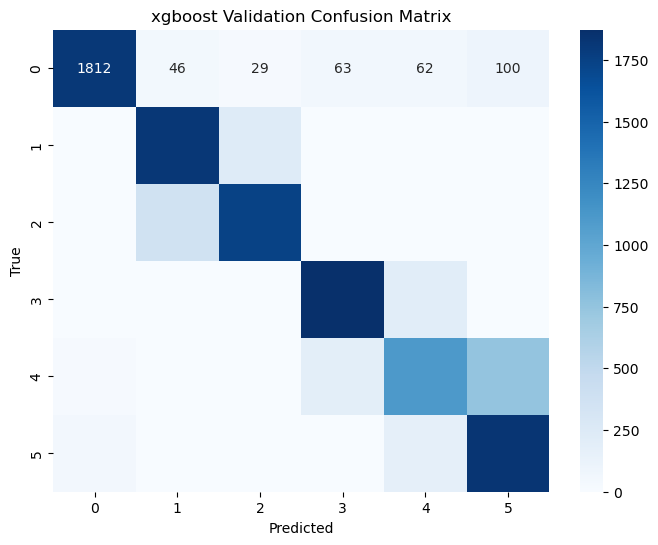

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn


Validation Results for xgboost:
Accuracy: 0.8145
Weighted F1: 0.8118

Training lightgbm...


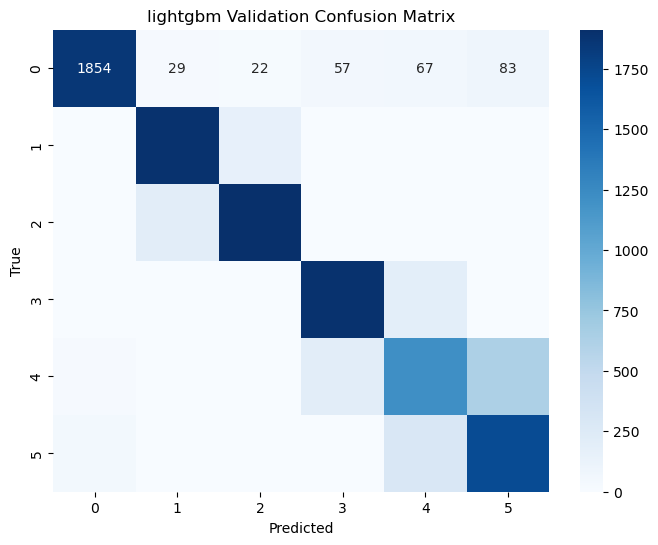


Validation Results for lightgbm:
Accuracy: 0.8379
Weighted F1: 0.8367

Training random_forest...


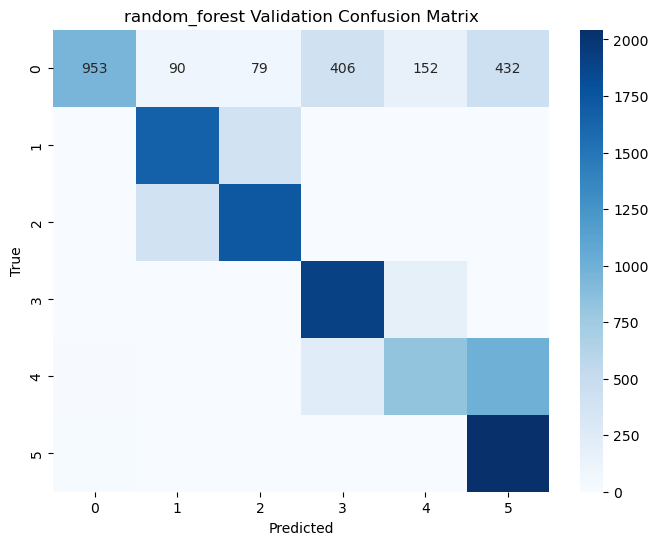


Validation Results for random_forest:
Accuracy: 0.7280
Weighted F1: 0.7122

Validation metrics for xgboost:
Accuracy: 0.8145
Weighted F1: 0.8118

Validation metrics for lightgbm:
Accuracy: 0.8379
Weighted F1: 0.8367

Validation metrics for random_forest:
Accuracy: 0.7280
Weighted F1: 0.7122

Model Performance Summary:
--------------------------------------------------

xgboost Results:
test_weighted_f1_mean: 0.8145
test_weighted_f1_std: 0.0027
test_balanced_accuracy_mean: 0.8170
test_balanced_accuracy_std: 0.0027

lightgbm Results:
test_weighted_f1_mean: 0.8347
test_weighted_f1_std: 0.0031
test_balanced_accuracy_mean: 0.8357
test_balanced_accuracy_std: 0.0030

random_forest Results:
test_weighted_f1_mean: 0.7167
test_weighted_f1_std: 0.0023
test_balanced_accuracy_mean: 0.7318
test_balanced_accuracy_std: 0.0018

Training ensemble model...
Shape of X: (62544, 51)
Unique classes in y: [0 1 2 3 4 5]
Class distribution: churn_risk_score
0    10424
1    10424
2    10424
3    10424
4    1042

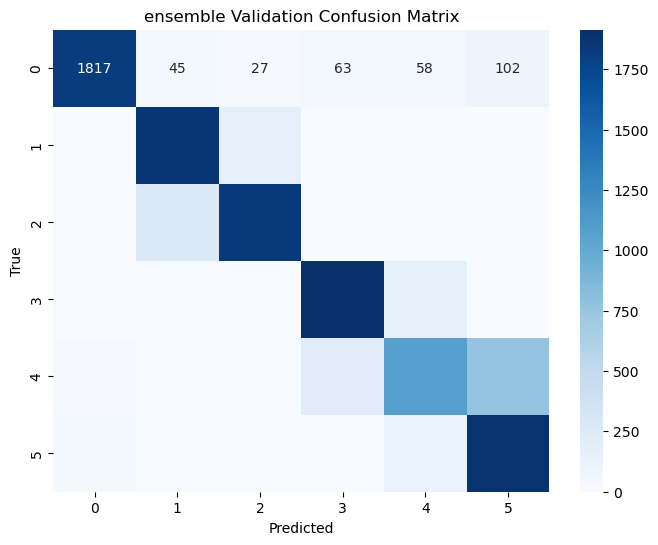

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

  warnings.warn


Validation Results for ensemble:
Accuracy: 0.8316
Weighted F1: 0.8273

Plotting feature importance...


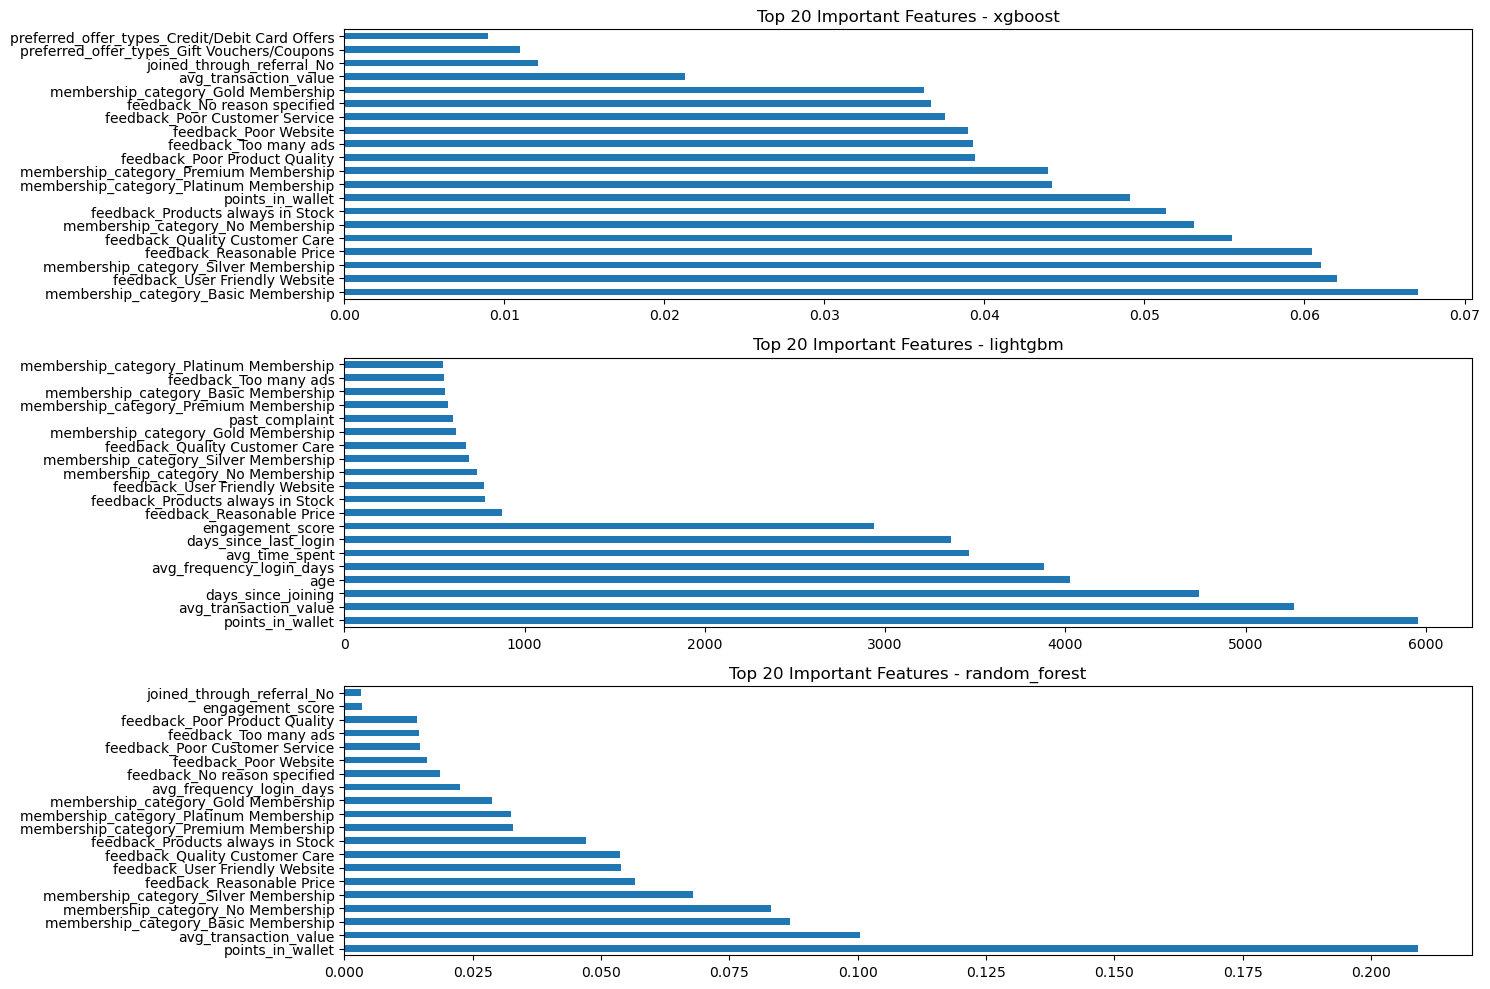


 results: {'xgboost': {'test_weighted_f1_mean': 0.8144706556426957, 'test_weighted_f1_std': 0.0026681538407788666, 'test_balanced_accuracy_mean': 0.8169768292851323, 'test_balanced_accuracy_std': 0.002737769171043949}, 'lightgbm': {'test_weighted_f1_mean': 0.8347091781702893, 'test_weighted_f1_std': 0.0031133372207441364, 'test_balanced_accuracy_mean': 0.8357475708492708, 'test_balanced_accuracy_std': 0.0029635017175233527}, 'random_forest': {'test_weighted_f1_mean': 0.7167103774574869, 'test_weighted_f1_std': 0.002272881782699004, 'test_balanced_accuracy_mean': 0.7318211227563055, 'test_balanced_accuracy_std': 0.0017839924987121658}} 
 feature importance {'xgboost': membership_category_Basic Membership              0.067092
feedback_User Friendly Website                    0.062014
membership_category_Silver Membership             0.061044
feedback_Reasonable Price                         0.060483
feedback_Quality Customer Care                    0.055459
membership_category_No Membe

In [35]:
# Use balanced data to run model pipeline
results, feature_importance, ensemble = run_model_pipeline(X, y)

print(f'\n results: {results} '
      f'\n feature importance {feature_importance} '
      f'\n ensemble {ensemble},')


### Tune Hyper Parameters

In [36]:
#  Tune XGBoost hyperparameters
best_xgb_params = tune_xgboost(X, y)
print("\nBest XGBoost parameters:")
print(best_xgb_params)

# Tune lightgbm hyperparameters
best_lgb_params = tune_lightgbm(X, y)
print("\nBest lightgbm parameters:")
print(best_lgb_params)

Processing categorical columns: []
Shape after processing: (62544, 51)
Data types after processing:
 age                                               float64
days_since_last_login                             float64
avg_time_spent                                    float64
avg_transaction_value                             float64
avg_frequency_login_days                          float64
points_in_wallet                                  float64
used_special_discount                             float64
offer_application_preference                      float64
past_complaint                                    float64
days_since_joining                                float64
days_since_last_visit                             float64
engagement_score                                  float64
gender_F                                             bool
gender_M                                             bool
gender_Unknown                                       bool
region_category_City         

### Model Development



In [37]:
# First, process categorical columns
X_processed = X.copy()
XT_processed = XT.copy()
categorical_columns = X_processed.select_dtypes(include=['object']).columns
print("Processing categorical columns:", categorical_columns.tolist())

Processing categorical columns: []


In [38]:
# Convert categorical columns for both training and test data
for col in categorical_columns:
    print(f"\nProcessing column: {col}")

    # Convert all values to strings first to ensure uniform type
    X_processed[col] = X_processed[col].astype(str)
    XT_processed[col] = XT_processed[col].astype(str)

    print(f"Unique values in training: {X_processed[col].unique()}")
    print(f"Unique values in test: {XT_processed[col].unique()}")

    if X_processed[col].nunique() == 2:
        # Binary categories
        le = LabelEncoder()
        # Combine unique values from both training and test
        all_values = pd.concat([X_processed[col], XT_processed[col]]).unique()
        le.fit(all_values)
        X_processed[col] = le.transform(X_processed[col])
        XT_processed[col] = le.transform(XT_processed[col])
    else:
        # Multi-class categories
        dummies_train = pd.get_dummies(X_processed[col], prefix=col)
        dummies_test = pd.get_dummies(XT_processed[col], prefix=col)

        # Add missing columns to each
        missing_in_train = set(dummies_test.columns) - set(dummies_train.columns)
        missing_in_test = set(dummies_train.columns) - set(dummies_test.columns)

        for col_name in missing_in_train:
            dummies_train[col_name] = 0
        for col_name in missing_in_test:
            dummies_test[col_name] = 0

        # Ensure columns are in the same order
        dummies_train = dummies_train.reindex(columns=sorted(dummies_train.columns))
        dummies_test = dummies_test.reindex(columns=sorted(dummies_test.columns))

        # Drop one category to avoid multicollinearity
        dummies_train = dummies_train.iloc[:, 1:]
        dummies_test = dummies_test.iloc[:, 1:]

        X_processed = pd.concat([X_processed.drop(col, axis=1), dummies_train], axis=1)
        XT_processed = pd.concat([XT_processed.drop(col, axis=1), dummies_test], axis=1)

print("\nFinal shapes:")
print(f"Training data shape: {X_processed.shape}")
print(f"Test data shape: {XT_processed.shape}")


Final shapes:
Training data shape: (62544, 51)
Test data shape: (19919, 51)


In [39]:
# Create optimized models with processed data
optimized_models = {
    'xgboost': xgb.XGBClassifier(**best_xgb_params),
    'lightgbm': lgb.LGBMClassifier(**best_lgb_params)
}

# Fit models with processed data
print("\nFitting models...")
for name, model in optimized_models.items():
    print(f"Fitting {name}...")
    model.fit(X_processed, y)

# Create and fit ensemble with processed data
print("\nCreating and fitting ensemble...")
final_ensemble = create_optimized_ensemble(optimized_models, X_processed, y)
final_ensemble.fit(X_processed, y)

# Make predictions using processed data
print("\nMaking predictions...")
predictions = {}
for name, model in optimized_models.items():
    print(f"Predicting with {name}...")
    predictions[name] = model.predict(XT_processed)

# Ensemble predictions
predictions['ensemble'] = final_ensemble.predict(XT_processed)


Fitting models...
Fitting xgboost...
Fitting lightgbm...

Creating and fitting ensemble...

Making predictions...
Predicting with xgboost...
Predicting with lightgbm...


# 6. Save Processed Data
# Save the processed datasets

## Saving Predictions

In [40]:
# Load original test CSV to keep customer IDs
original_test = pd.read_csv('https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv')

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'customer_id': original_test['customer_id'],
    'predicted_churn_risk': predictions['ensemble']
})

In [41]:
# Save predictions
predictions_df.to_csv('final_predictions.csv', index=False)

# Show distribution of predictions
print("\nPredictions distribution:")
print(pd.Series(predictions['ensemble']).value_counts().sort_index())


Predictions distribution:
0       8
1    1670
2    1340
3    5854
4    4689
5    6358
Name: count, dtype: int64


In [42]:
yt = predictions['ensemble']
print("\nTrain variable unique values:")
print(y.unique())
print("\nTest target variable unique values:")
print(pd.Series(yt).unique())



Train variable unique values:
[2 1 5 3 4 0]

Test target variable unique values:
[3 4 5 1 2 0]


# 7. Correlation Analysis

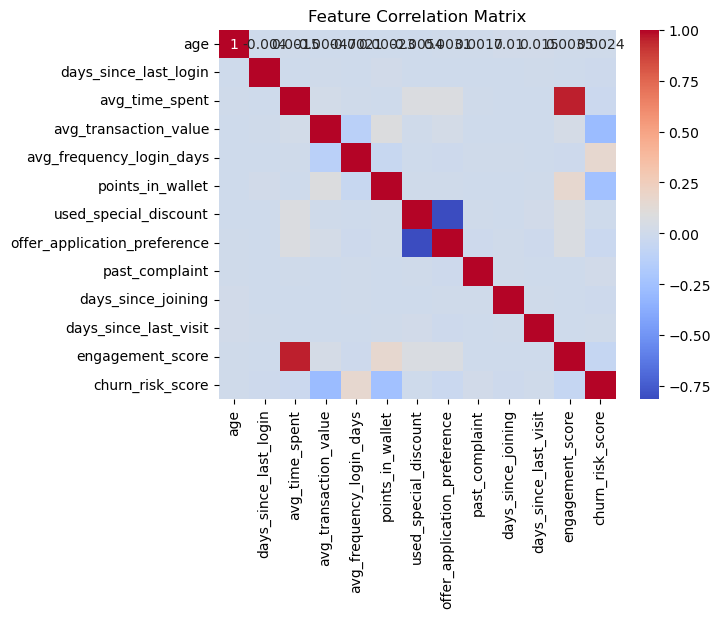

In [43]:
# Select only numerical features for correlation analysis
numerical_features = train_processed.select_dtypes(include=['number']).columns
sns.heatmap(train_processed[numerical_features].corr(), annot=True, cmap='coolwarm')


plt.title('Feature Correlation Matrix')
plt.show()

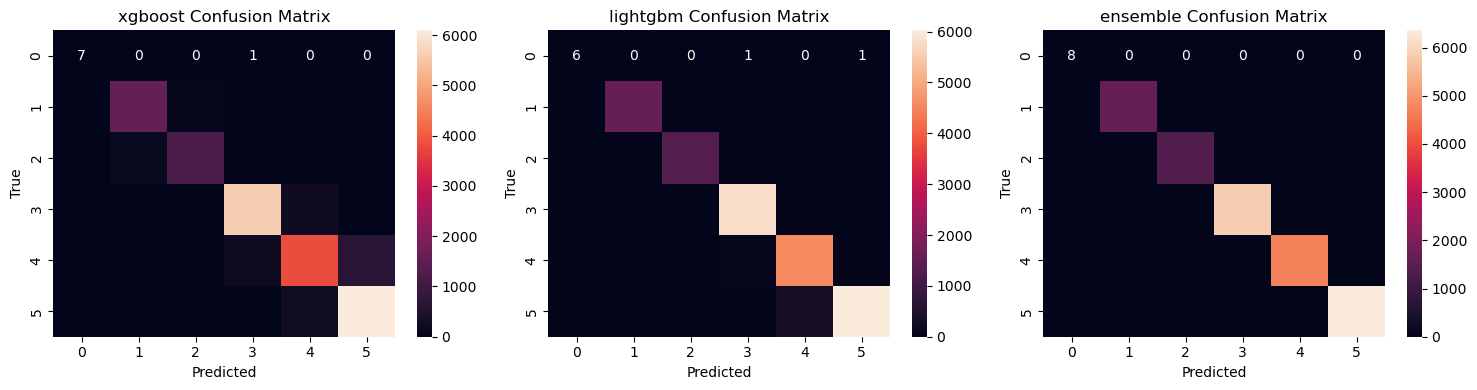

In [44]:
plot_confusion_matrices(yt, predictions)

In [45]:
reports = print_classification_reports(yt, predictions)
metrics_comparison = compare_model_metrics(reports)


xgboost Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.93      0.95      0.94      1670
           2       0.93      0.91      0.92      1340
           3       0.96      0.96      0.96      5854
           4       0.88      0.82      0.85      4689
           5       0.90      0.96      0.93      6358

    accuracy                           0.92     19919
   macro avg       0.87      0.91      0.88     19919
weighted avg       0.92      0.92      0.92     19919


lightgbm Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.97      0.96      0.97      1670
           2       0.95      0.97      0.96      1340
           3       0.99      0.99      0.99      5854
           4       0.92      0.97      0.95      4689
           5       0.99      0.95      0.97      6358

    accuracy


## Final Notes and Observations:

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:


4. Next Steps:
   - Model Preparation:
    - Additional Analysis Needed:
    - Correlation analysis between numerical features
    - Feature importance analysis
    - Interaction effects between features
    - Time-based patterns in customer behavior


  - Model Considerations:
    - Use models that handle class imbalance well (XGBoost, LightGBM)
    - Implement cross-validation with stratification
    - Consider ensemble methods
    - Focus on metrics like weighted F1-score or balanced accuracy
   